In [1]:
import gc
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
!ls '../input'

sample_submission.csv  test  test.zip  train  train.csv.zip  unarch


In [4]:
train_df = pd.read_csv('../input/train/train.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
acoustic_data      int64
time_to_failure    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 GB


In [6]:
train_df.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


In [7]:
train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [8]:
train_df.tail()

,acoustic_data,time_to_failure
629145475,7,9.759796
629145476,9,9.759796
629145477,10,9.759796
629145478,6,9.759796
629145479,5,9.759796


In [9]:
acoustic_data_df = train_df[train_df.columns.drop('time_to_failure')].astype(np.int32)

In [10]:
time_to_failure_df = train_df[train_df.columns.drop('acoustic_data')].astype(np.float32)

In [11]:
compressed_train_df = pd.concat([acoustic_data_df, time_to_failure_df], axis=1)

In [12]:
compressed_train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [13]:
compressed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
acoustic_data      int32
time_to_failure    float32
dtypes: float32(1), int32(1)
memory usage: 4.7 GB


In [14]:
compressed_train_df.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678285e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173395e+00
max,5.444000e+03,1.610740e+01


In [15]:
train_df.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


In [16]:
train_df = compressed_train_df

In [17]:
train_df.shape

(629145480, 2)

In [18]:
#del acoustic_data_df 
#del time_to_failure_df
gc.collect()

21

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
acoustic_data      int32
time_to_failure    float32
dtypes: float32(1), int32(1)
memory usage: 4.7 GB


In [20]:
unique_acoustic_data = train_df['acoustic_data'].unique()

In [21]:
unique_time_to_failure = train_df['time_to_failure'].unique()

In [22]:
unique_acoustic_data.shape

(5354,)

In [23]:
unique_time_to_failure.shape

(3340667,)

In [24]:
train_df.shape

(629145480, 2)

In [25]:
fig = plt.figure(figsize=(24, 18))
#ax = fig.add_axes?

<Figure size 1728x1296 with 0 Axes>

In [26]:
ax = fig.add_subplot(111)

In [27]:
ax.set_xlim(train_df['acoustic_data'].min(), train_df['acoustic_data'].max())

(-5515, 5444)

In [28]:
#ax = fig.add_axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7425473ac8>]],
      dtype=object)

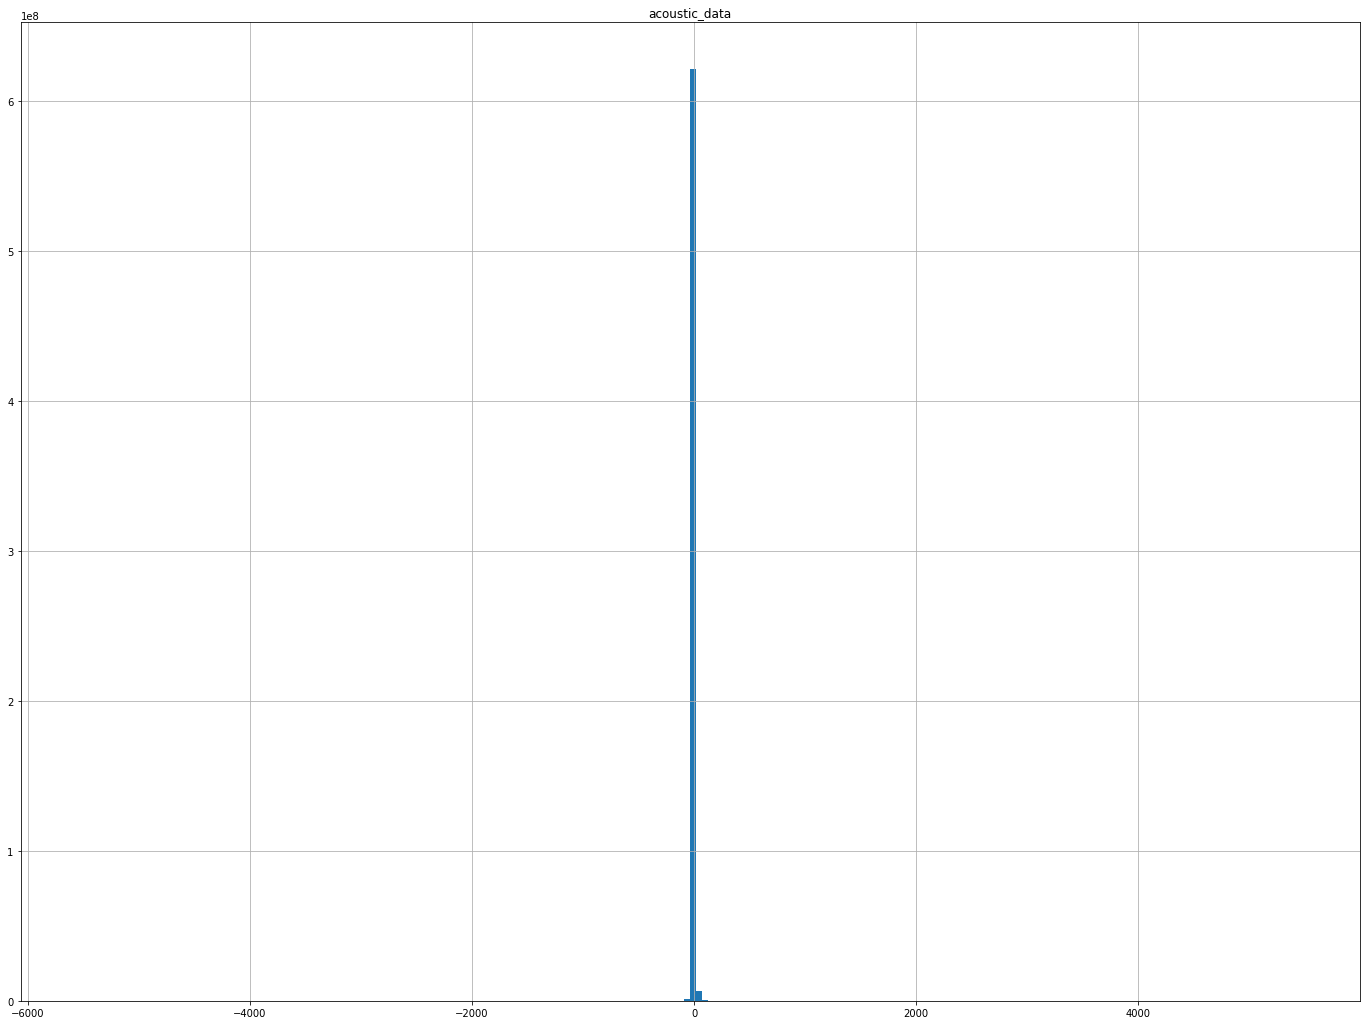

In [29]:
train_df.hist(column='acoustic_data', bins=200, figsize=(24, 18))

In [30]:
train_df['acoustic_data'].count()

629145480

In [31]:
#grouped_train_df_by_acoustic = train_df[train_df.columns.drop('time_to_failure')].groupby('acoustic_data')
grouped_train_series_by_acoustic = train_df['acoustic_data'].groupby(by=train_df['acoustic_data'])

In [85]:
dir(grouped_train_series_by_acoustic)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_def_str',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cythonized_result',
 '_get_index',
 '_get_indices',
 '_gotitem',
 '_group_selection',
 '_int

In [32]:
type(grouped_train_series_by_acoustic)

pandas.core.groupby.groupby.SeriesGroupBy

In [33]:
count_train_series_acoustic = grouped_train_series_by_acoustic.count()

In [34]:
type(count_train_series_acoustic)

pandas.core.series.Series

In [90]:
print(count_train_series_acoustic.memory_usage())

249504


In [35]:
count_train_series_acoustic.shape

(5354,)

In [36]:
count_train_series_acoustic.head()

acoustic_data
-5515    1
-5474    1
-5251    1
-5135    1
-5008    1
Name: acoustic_data, dtype: int64

In [37]:
count_train_series_acoustic[-5008]

1

In [38]:
count_acoustic_more_20 = count_train_series_acoustic[count_train_series_acoustic > 20]

In [91]:
print(count_acoustic_more_20.memory_usage())

21472


In [39]:
count_acoustic_more_20.shape

(1342,)

In [40]:
print(count_acoustic_more_20.min())
print(count_acoustic_more_20.max())

21
73883469


In [41]:
#fig = plt.figure(figsize=(24, 18))
#ax = fig.add_subplot(111)
#ax.set_xlim(count_acoustic_more_20.min(), count_acoustic_more_20.max())

In [42]:
count_acoustic_more_20.mode()

0    23
dtype: int64

In [43]:
count_acoustic_more_20.tail()

acoustic_data
766    21
772    27
774    21
778    22
948    22
Name: acoustic_data, dtype: int64

In [44]:
#count_acoustic_more_20[73883469]

In [45]:
index_count_acoustic_more_20 = count_acoustic_more_20.index

In [46]:
print(index_count_acoustic_more_20[:10])
print(index_count_acoustic_more_20[-10:])

Int64Index([-840, -832, -827, -819, -813, -805, -796, -787, -786, -784], dtype='int64', name='acoustic_data')
Int64Index([738, 740, 741, 750, 754, 766, 772, 774, 778, 948], dtype='int64', name='acoustic_data')


In [47]:
print(index_count_acoustic_more_20.min())
print(index_count_acoustic_more_20.max())

-840
948


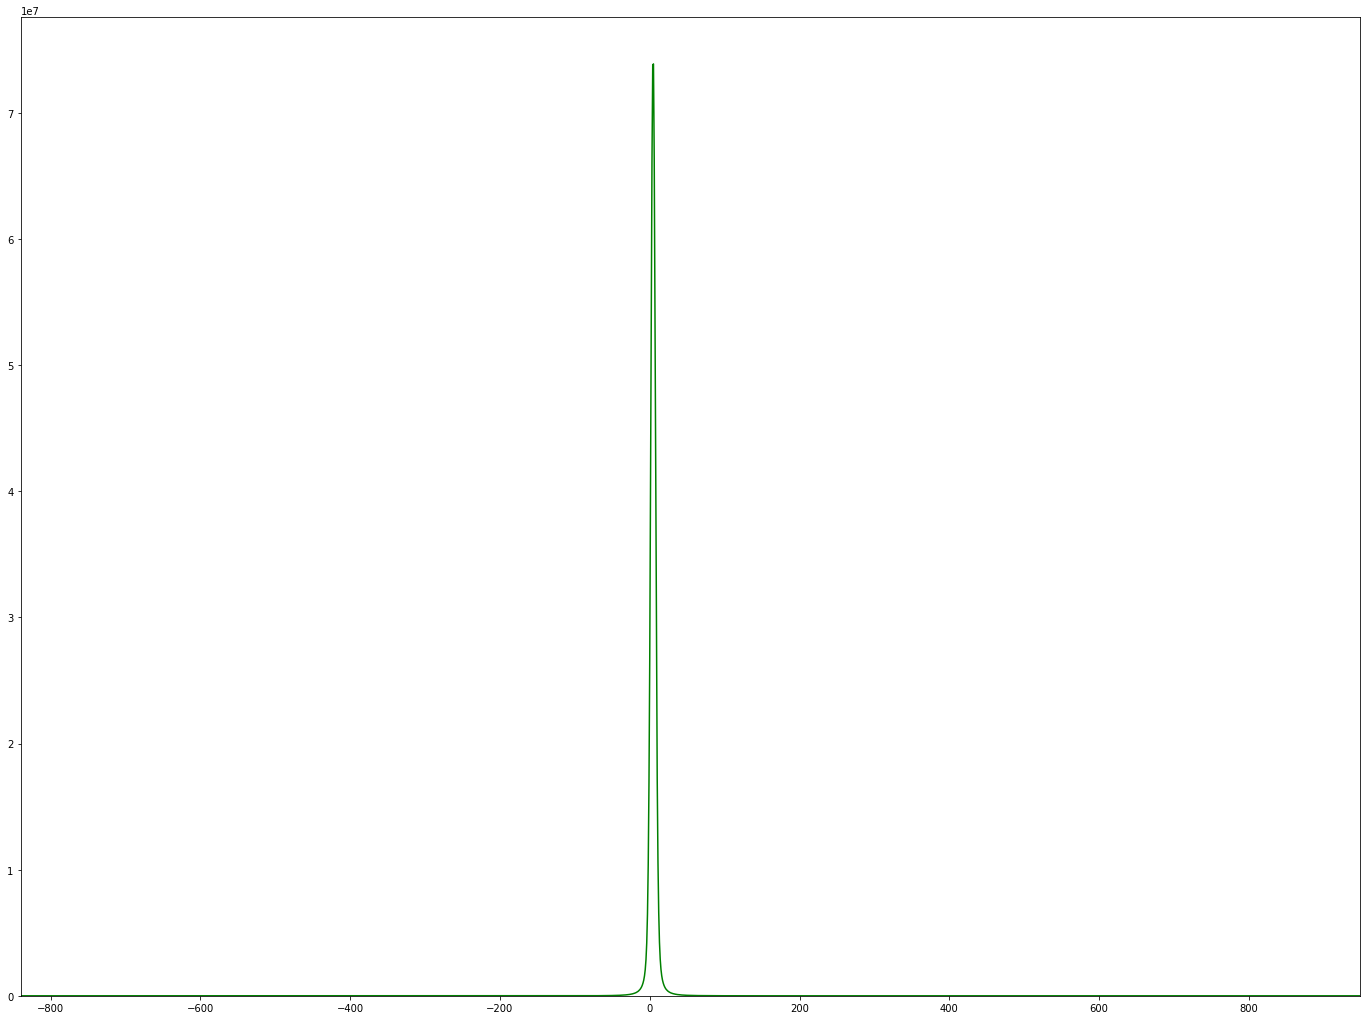

In [48]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.hist(count_acoustic_more_20, color='gray', bins=60)
plt.show()

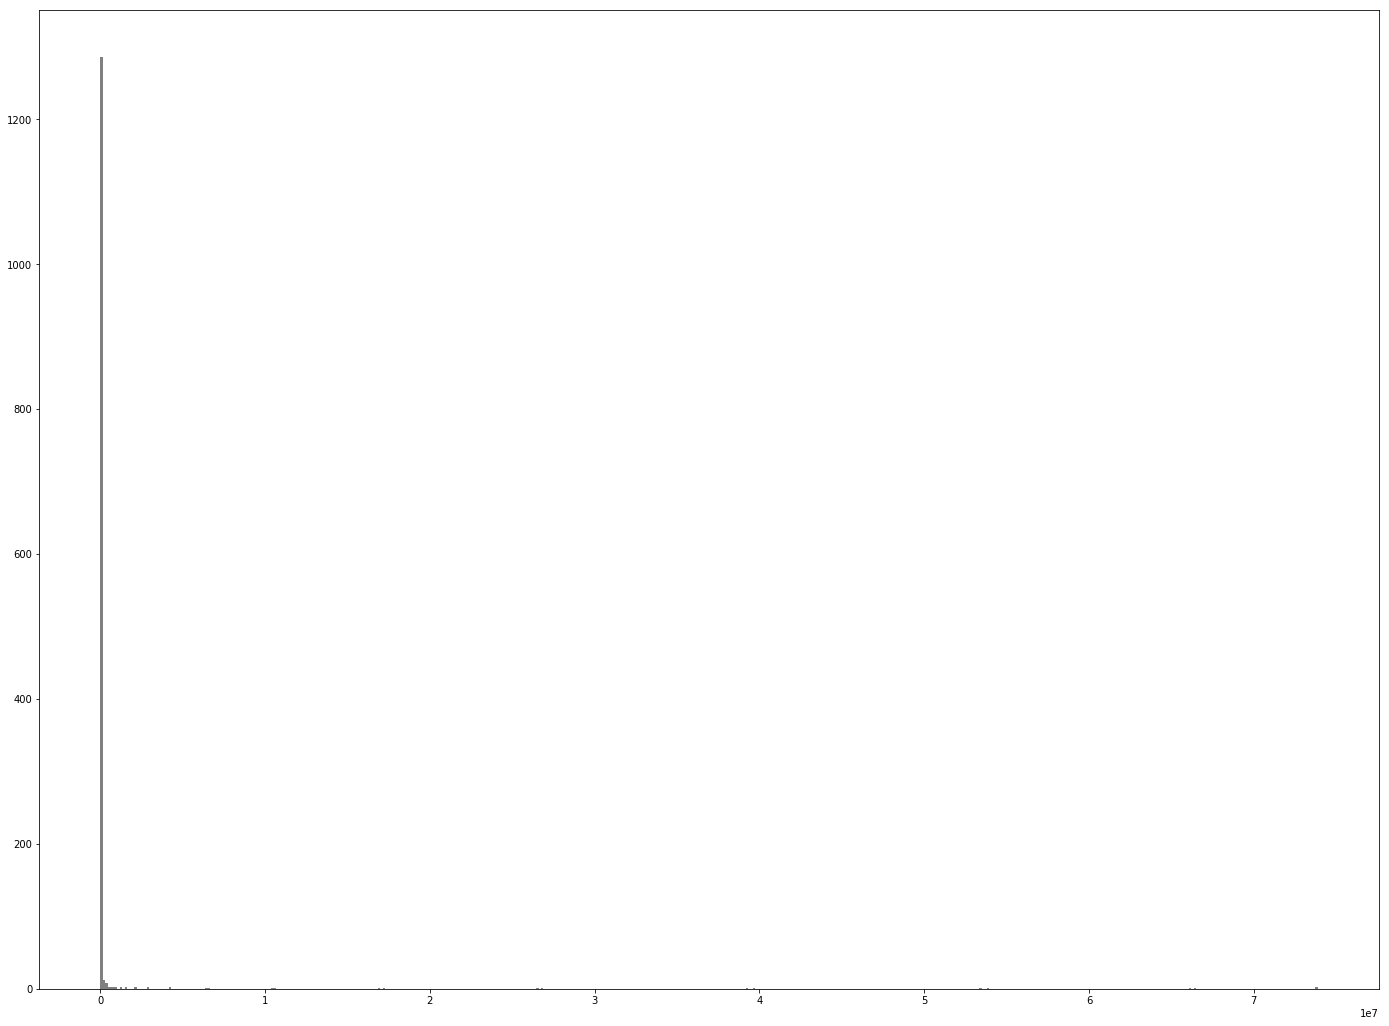

In [49]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.hist(count_acoustic_more_20, color='gray', bins=500)
plt.show()

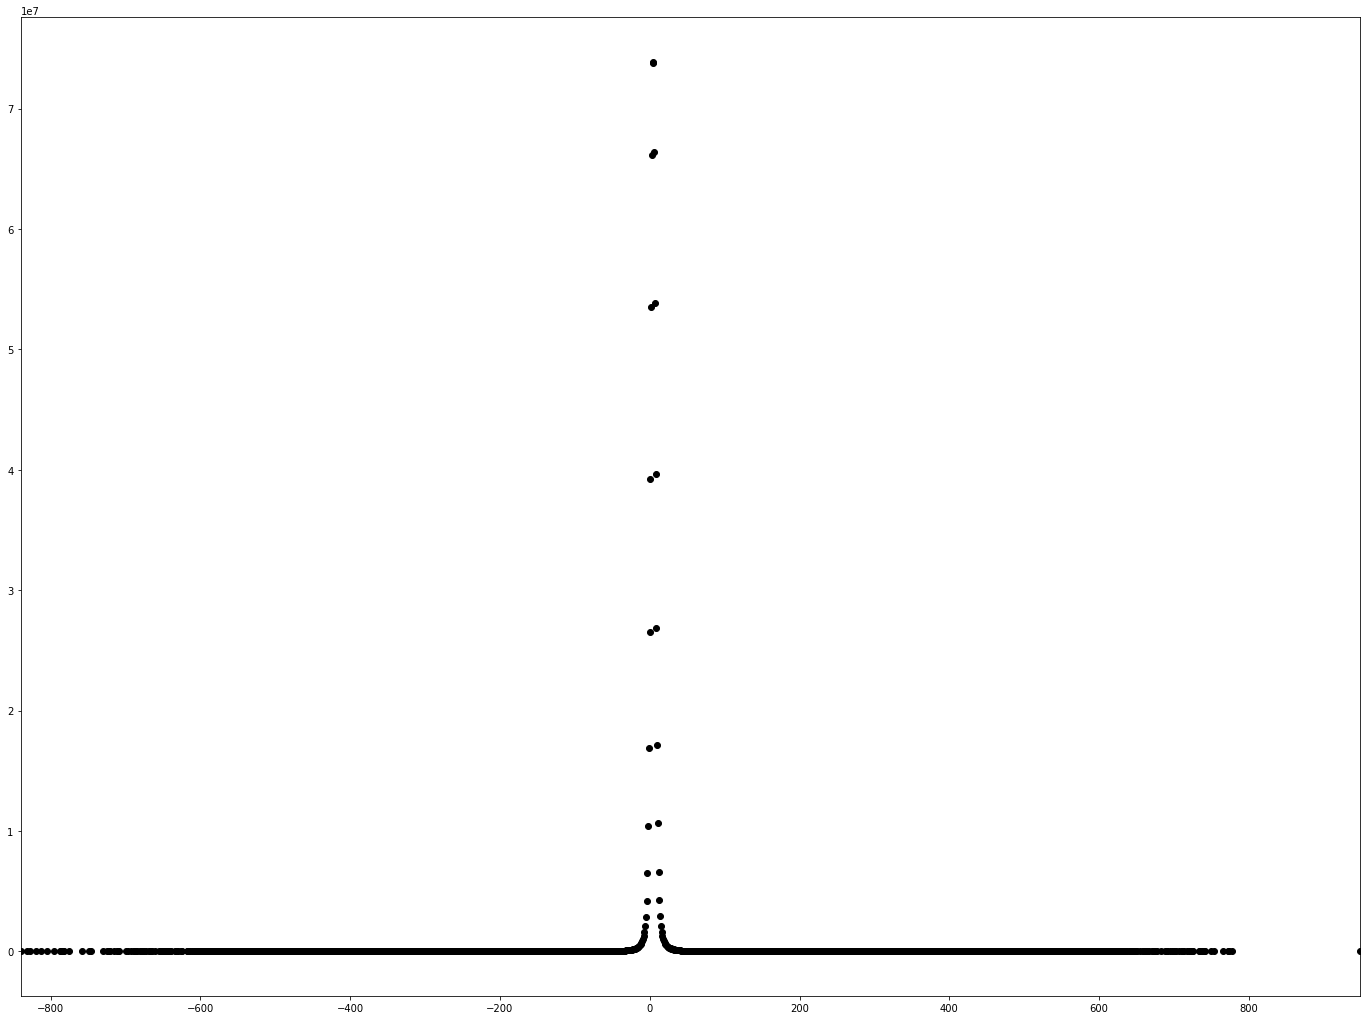

In [50]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.scatter(index_count_acoustic_more_20, count_acoustic_more_20, color='black')
plt.show()

In [51]:
print(count_acoustic_more_20.unique())

[      21       22       23       27       28       24       25       30
       26       32       33       41       31       36       35       29
       34       37       40       38       39       44       42       47
       43       52       45       46       53       51       49       50
       55       57       59       48       68       56       61       63
       58       60       62       67       66       69       74       54
       70       65       79       64       76       80       78       73
       75       84       90       83       91       82       85       86
       95       94       92      127      108       98      106      109
       77       88      100      115      102       97       99      107
      110      117      125      104      111      131      122      133
      118      116      123      141      129      153      137      160
      138      159      135      156      148      171      161      169
      155      165      176      167      172      

In [52]:
print(count_acoustic_more_20.unique().shape)
print(count_acoustic_more_20.shape)

(574,)
(1342,)


In [53]:
count_acoustic_more_40 = count_train_series_acoustic[count_train_series_acoustic > 40]

In [54]:
print(count_acoustic_more_40.unique().shape)
print(count_acoustic_more_40.shape)
print(count_acoustic_more_40.unique())

(554,)
(927,)
[      41       44       42       47       43       52       45       46
       53       51       49       50       55       57       59       48
       68       56       61       63       58       60       62       67
       66       69       74       54       70       65       79       64
       76       80       78       73       75       84       90       83
       91       82       85       86       95       94       92      127
      108       98      106      109       77       88      100      115
      102       97       99      107      110      117      125      104
      111      131      122      133      118      116      123      141
      129      153      137      160      138      159      135      156
      148      171      161      169      155      165      176      167
      172      199      173      185      198      183      194      186
      210      212      227      213      220      241      211      244
      205      231      240      225 

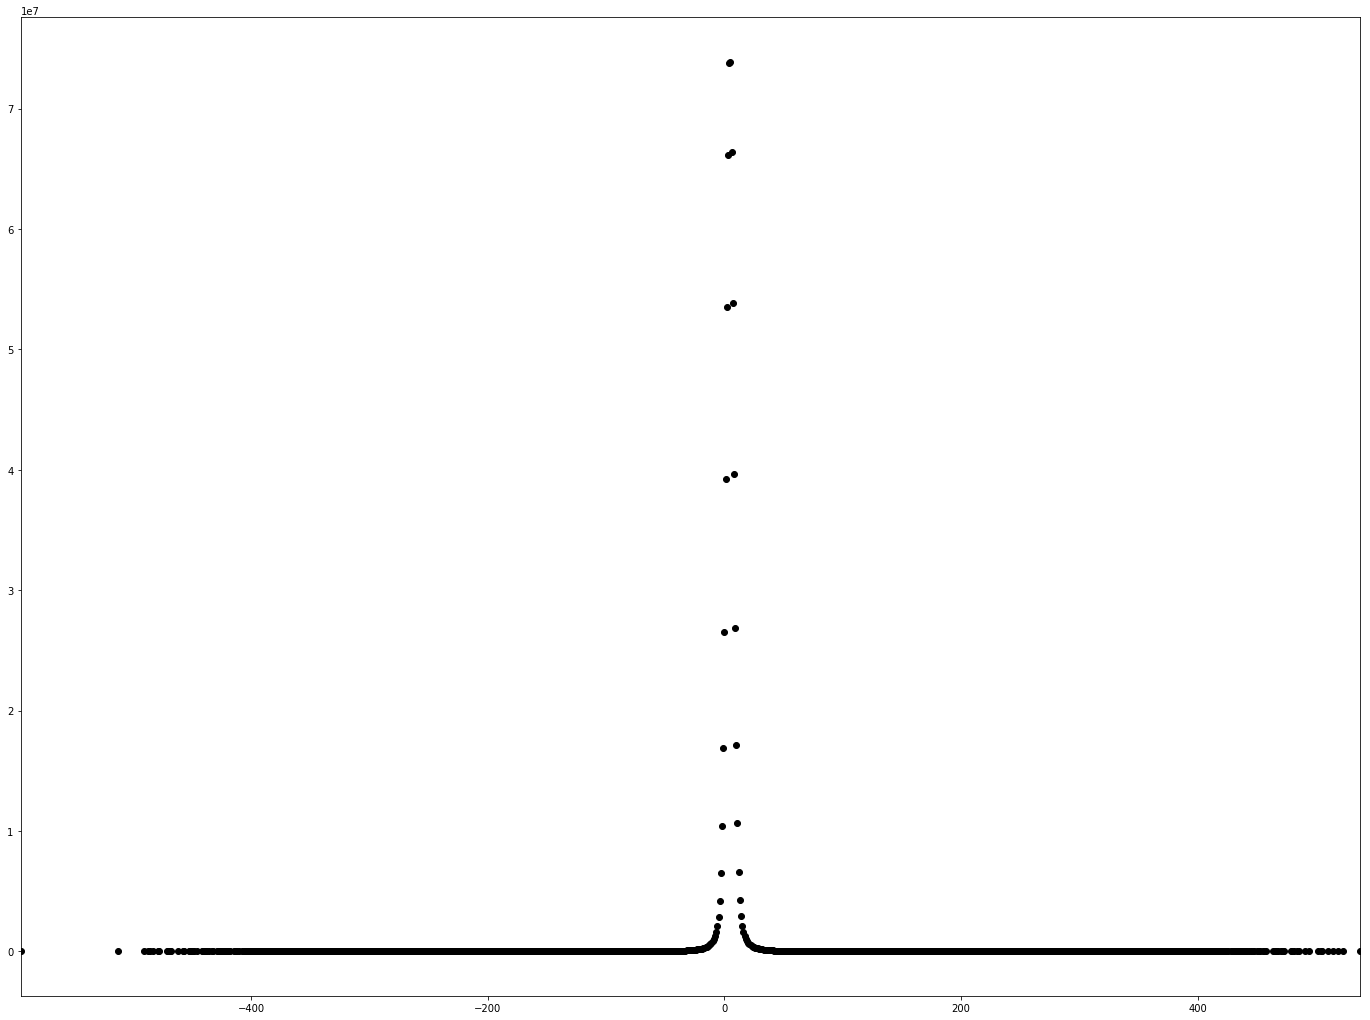

In [55]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(count_acoustic_more_40.index.min(), count_acoustic_more_40.index.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.scatter(count_acoustic_more_40.index, count_acoustic_more_40, color='black')
plt.show()

In [56]:
print("count_train_series_acoustic.min(): ", count_train_series_acoustic.min())
print("count_train_series_acoustic.max(): ", count_train_series_acoustic.max())
print("count_train_df_acoustic.index.min(): ", count_train_series_acoustic.index.min())
print("count_train_df_acoustic.index.max(): ", count_train_series_acoustic.index.max())
print("count_train_series_acoustic.mode(): ", count_train_series_acoustic.mode())
print("count_train_series_acoustic.median(): ", count_train_series_acoustic.median())
print("count_train_series_acoustic.mean(): ", count_train_series_acoustic.mean())
#print("count_train_series_acoustic.index.mode(): ", count_train_series_acoustic.index.mode())
#print("count_train_series_acoustic.index.median(): ", count_train_series_acoustic.index.median())
#print("count_train_series_acoustic.index.mean(): ", count_train_series_acoustic.index.mean())

count_train_series_acoustic.min():  1
count_train_series_acoustic.max():  73883469
count_train_df_acoustic.index.min():  -5515
count_train_df_acoustic.index.max():  5444
count_train_series_acoustic.mode():  0    1
dtype: int64
count_train_series_acoustic.median():  5.0
count_train_series_acoustic.mean():  117509.42846469929


In [57]:
count_train_series_acoustic.mode()

0    1
dtype: int64

In [58]:
count_train_series_acoustic[count_train_series_acoustic == 0].shape

(0,)

In [59]:
count_train_series_acoustic[count_train_series_acoustic == 1].shape

(1185,)

In [60]:
#count_train_series_acoustic.mode?

In [61]:
count_train_series_acoustic.head()

acoustic_data
-5515    1
-5474    1
-5251    1
-5135    1
-5008    1
Name: acoustic_data, dtype: int64

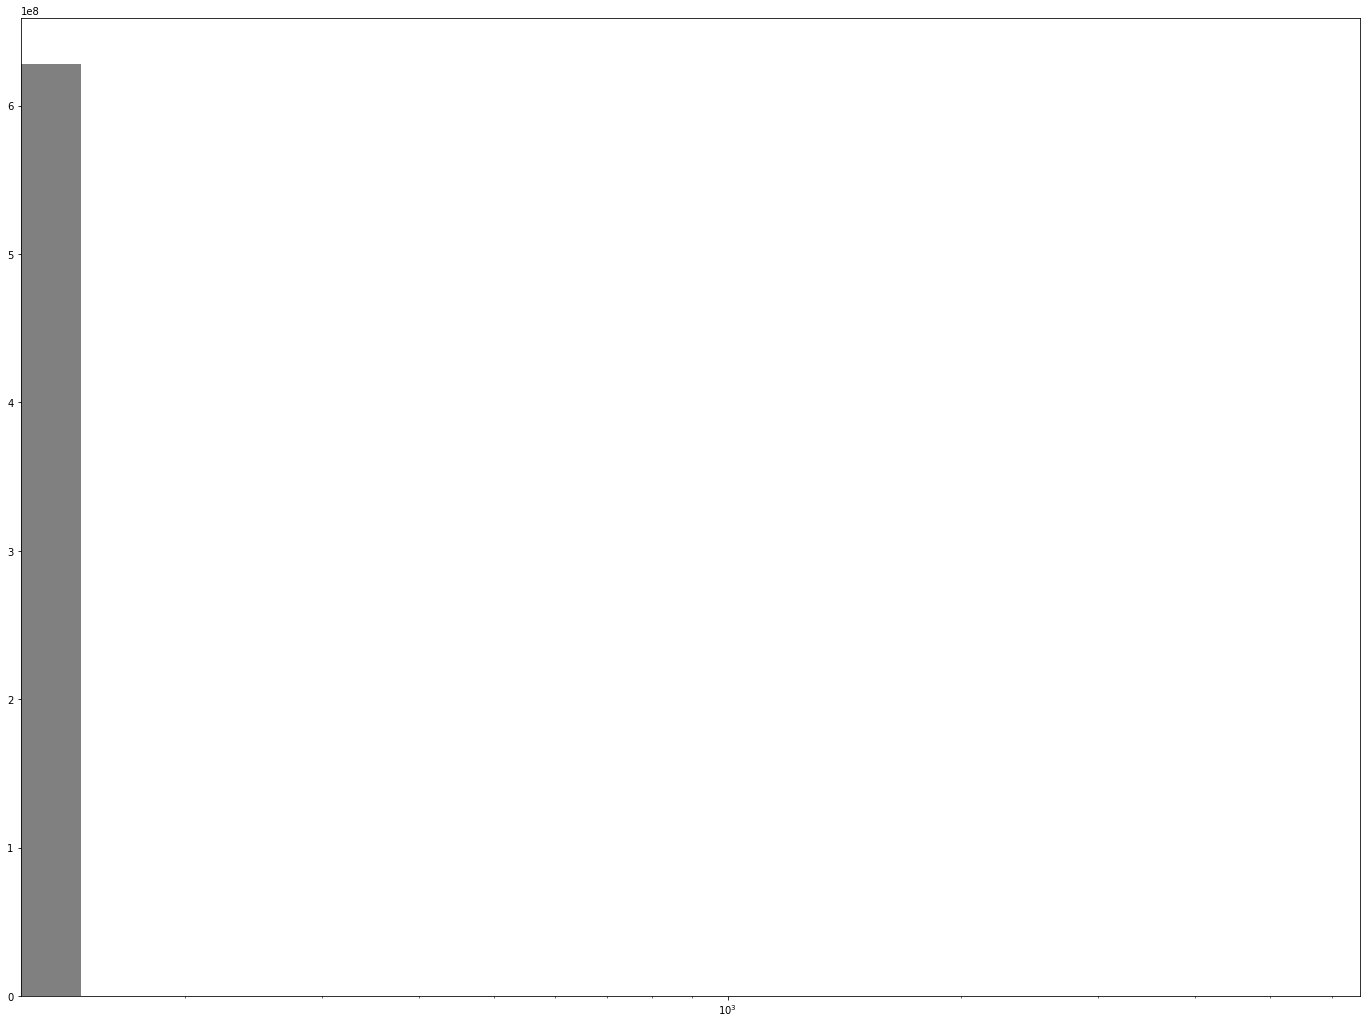

In [62]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(train_df['acoustic_data'], color='gray', bins=60)
ax.set_xscale('log')
plt.show()

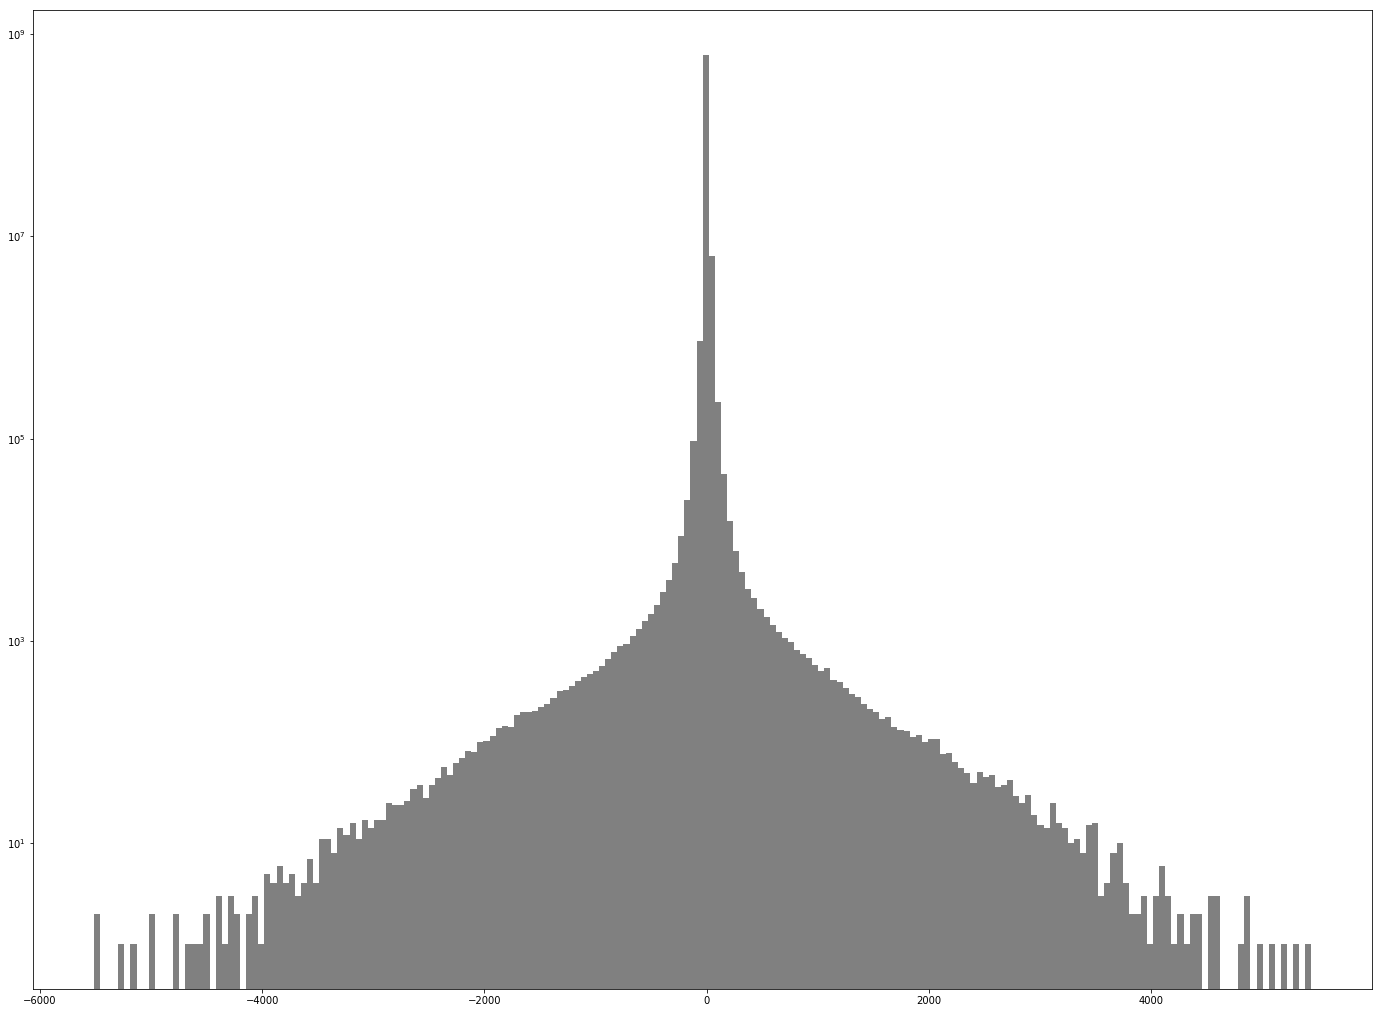

In [63]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(train_df['acoustic_data'], color='gray', bins=200)
ax.set_yscale('log')
plt.show()

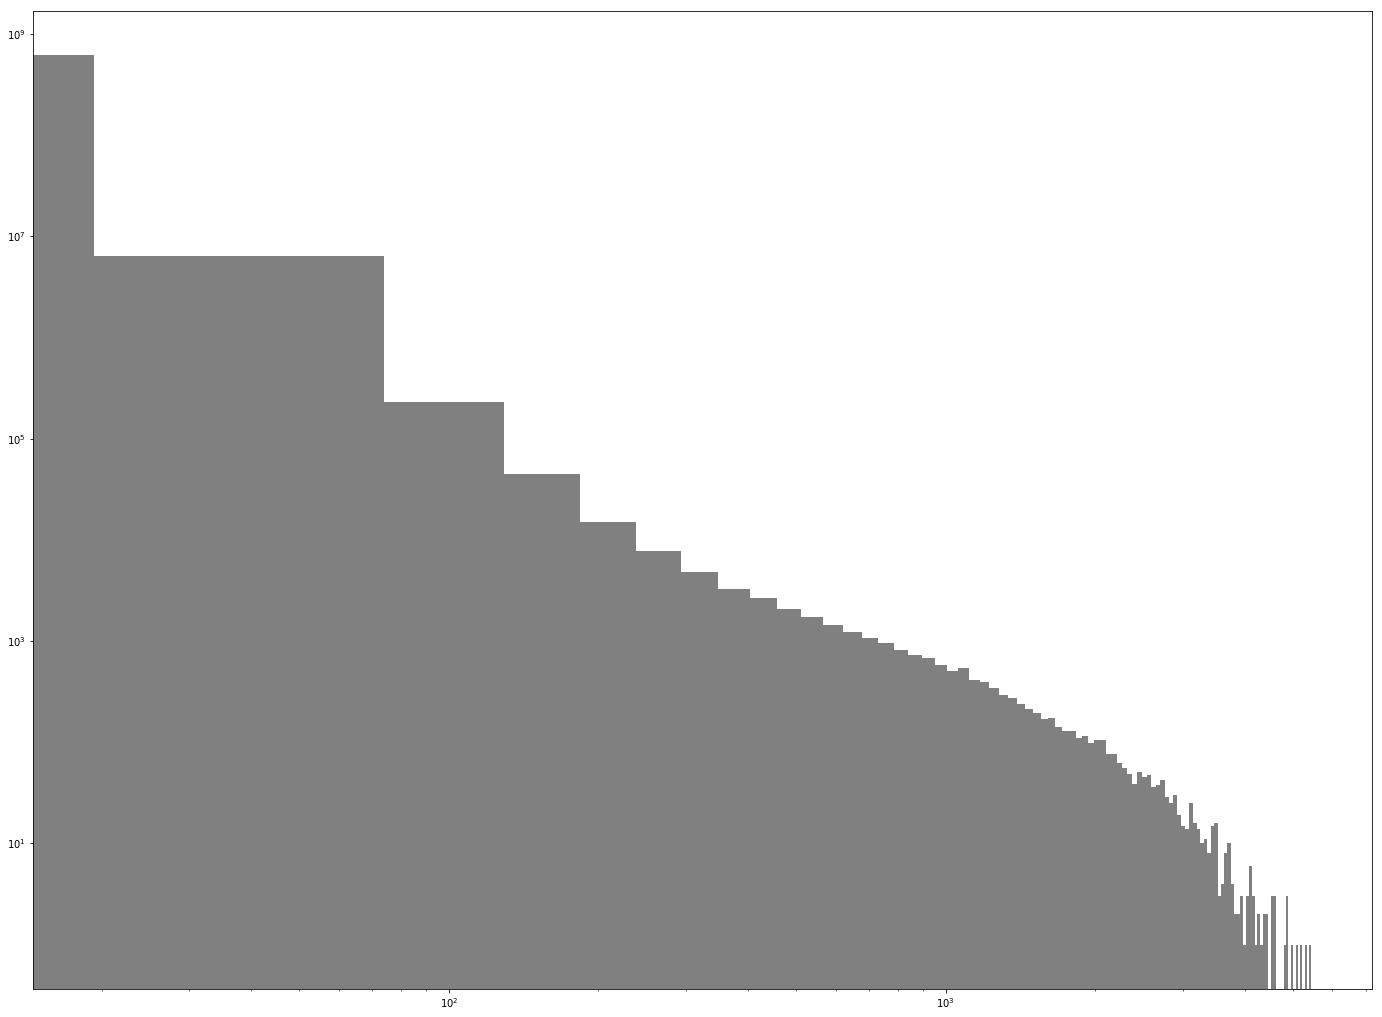

In [64]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(train_df['acoustic_data'], color='gray', bins=200)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [65]:
#fig = plt.figure(figsize=(24, 18))
#ax = fig.add_subplot(111)
#ax.hist(np.log(train_df['acoustic_data']), color='gray', bins=200)
#ax.set_yscale('log')
#plt.show()

In [66]:
#acoustic_data_log = np.log(train_df['acoustic_data'])

In [67]:
#print("acoustic_data_log.min(): ", acoustic_data_log.min())
#print("acoustic_data_log.max(): ", acoustic_data_log.max())

acoustic_data_log.min():  -inf
acoustic_data_log.max():  8.602269363771356


In [68]:
-np.inf

-inf

In [69]:
np.log(np.iinfo(np.int32).min)

nan

In [71]:
#acoustic_data_log[acoustic_data_log < 0]

In [72]:
gc.collect()

4491

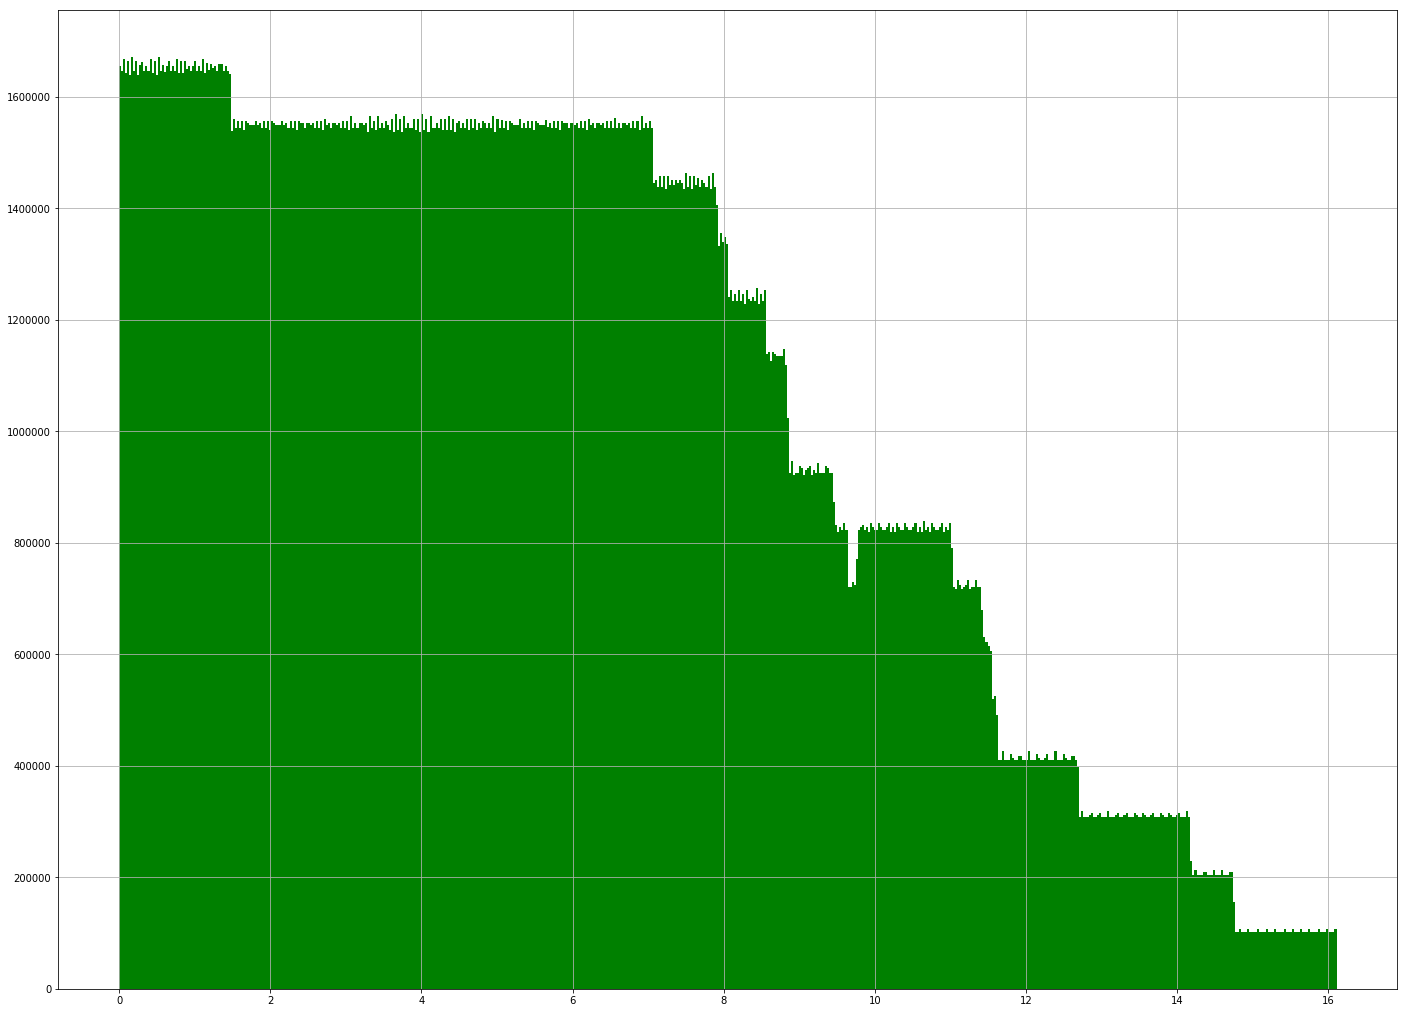

In [79]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(, )
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
#ax.hist(time_to_failure_df, color='green', bins=60)
train_df['time_to_failure'].hist(bins=600, color='green')
plt.show()

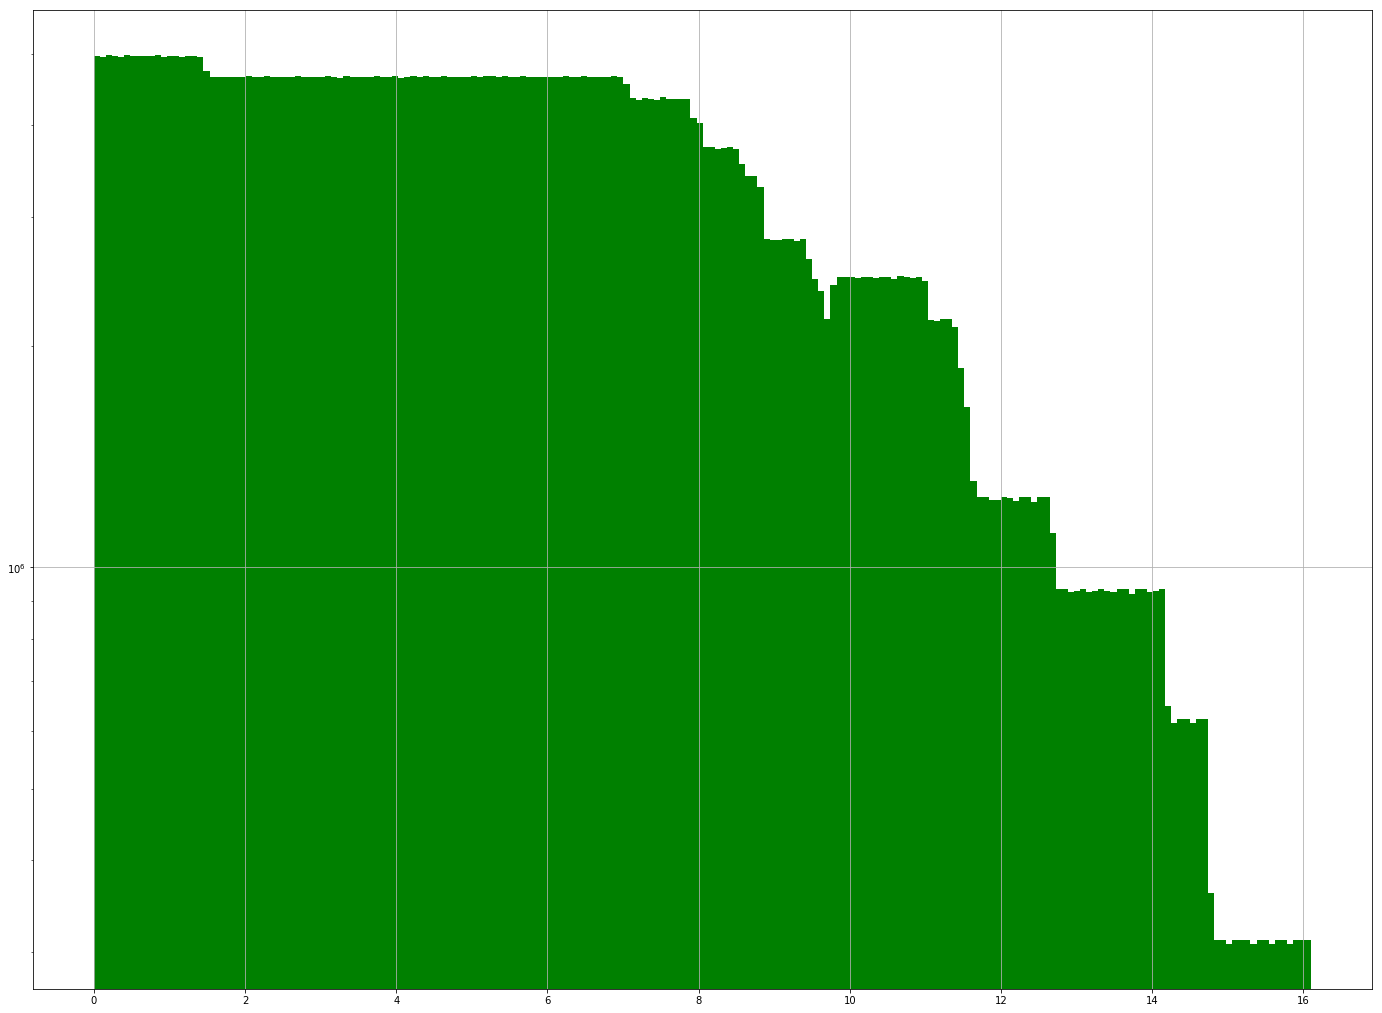

In [74]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(, )
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
#ax.hist(time_to_failure_df, color='green', bins=60)
train_df['time_to_failure'].hist(bins=200, color='green')
ax.set_yscale('log')
plt.show()

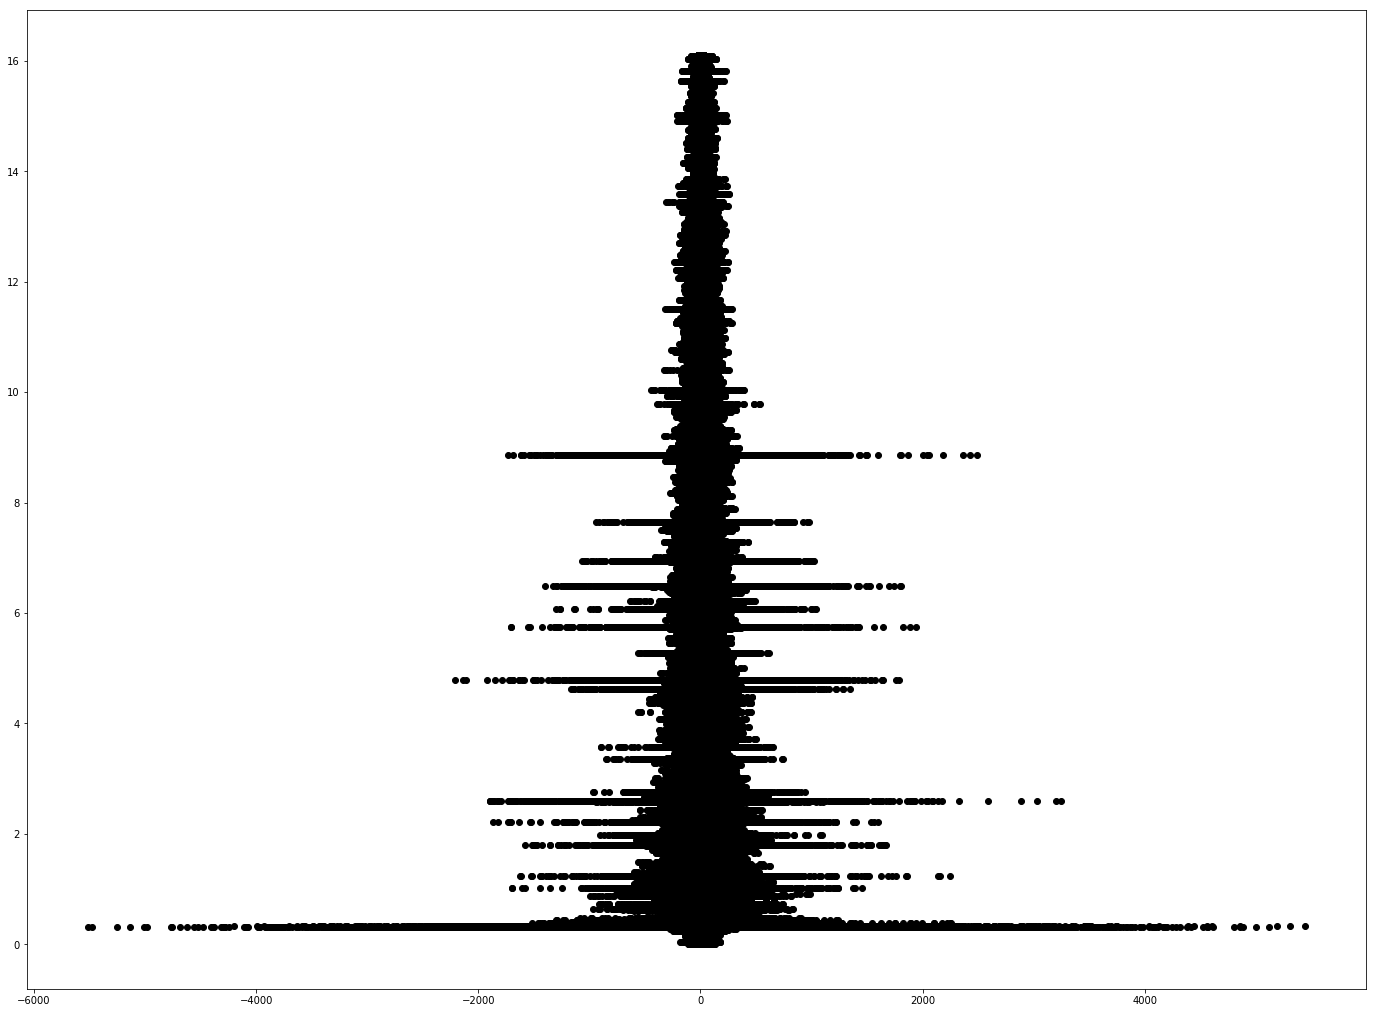

In [76]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(count_acoustic_more_40.index.min(), count_acoustic_more_40.index.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.scatter(train_df['acoustic_data'], train_df['time_to_failure'], color='black')
#train_df.scatter(color='black')
plt.show()

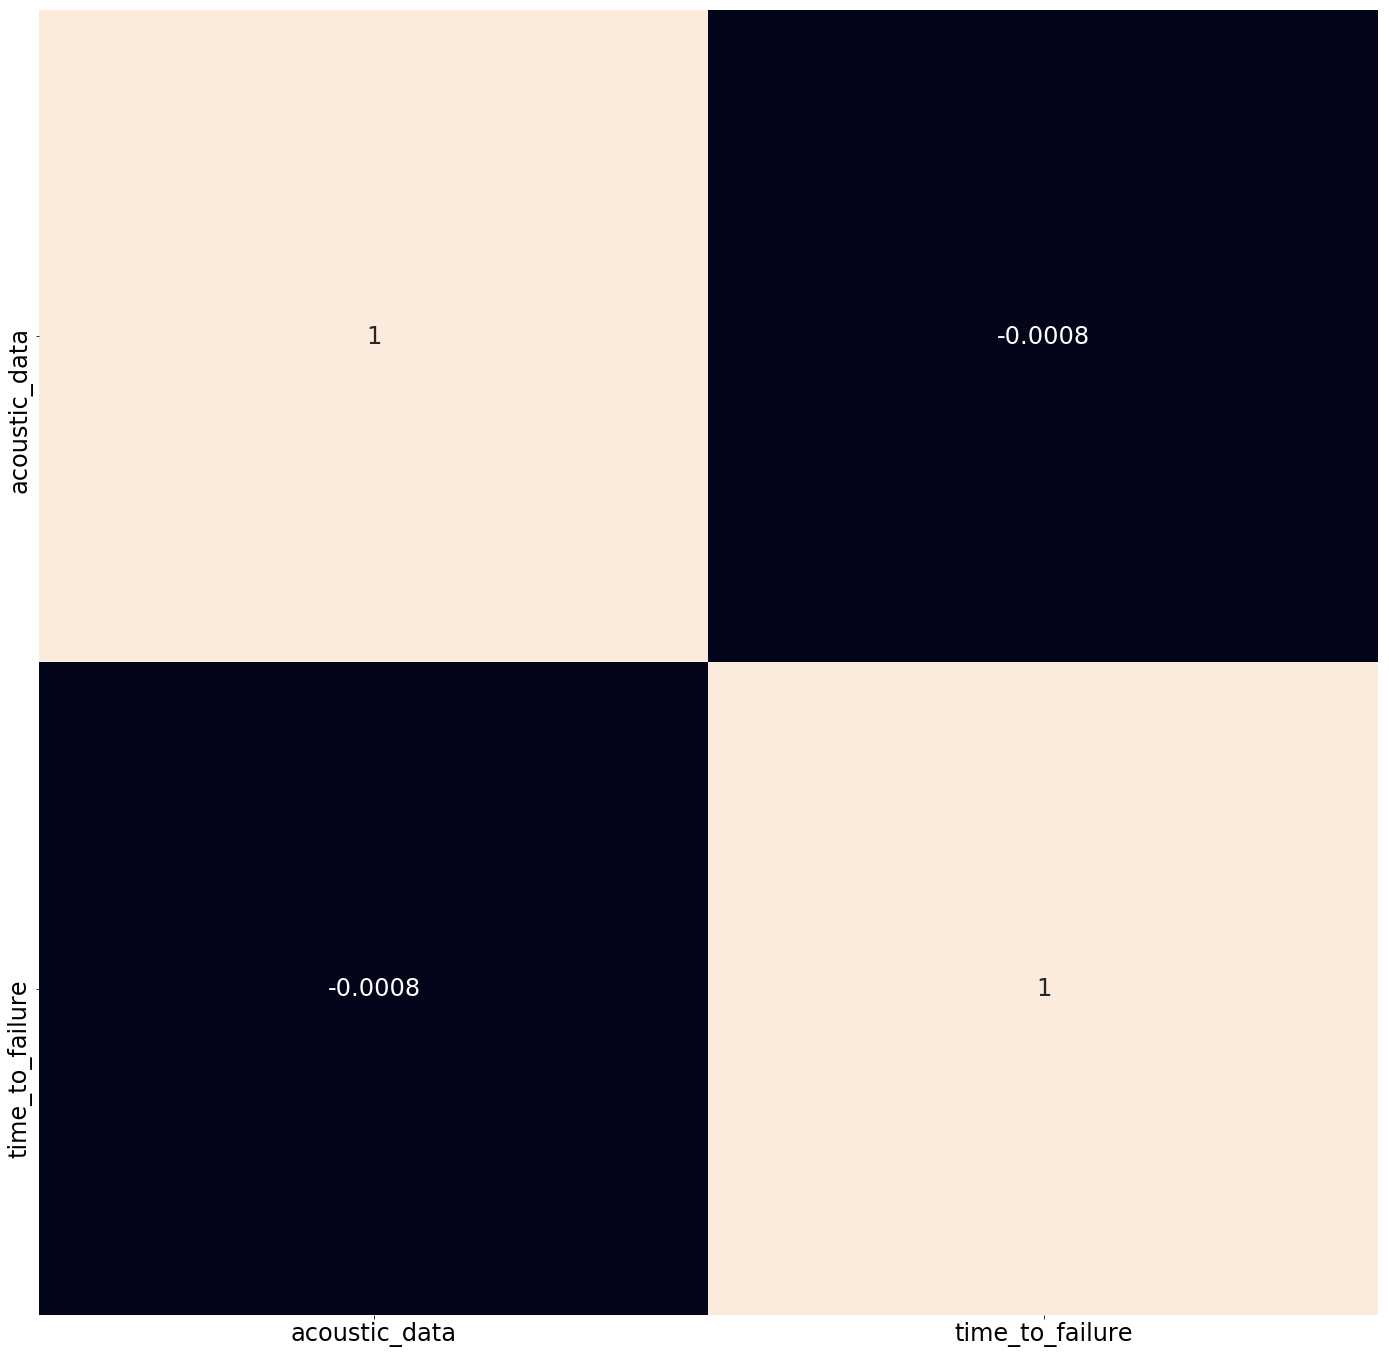

In [77]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(
    train_df.corr().round(4),
    annot=True, annot_kws={"size":24},
    cbar=False
)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

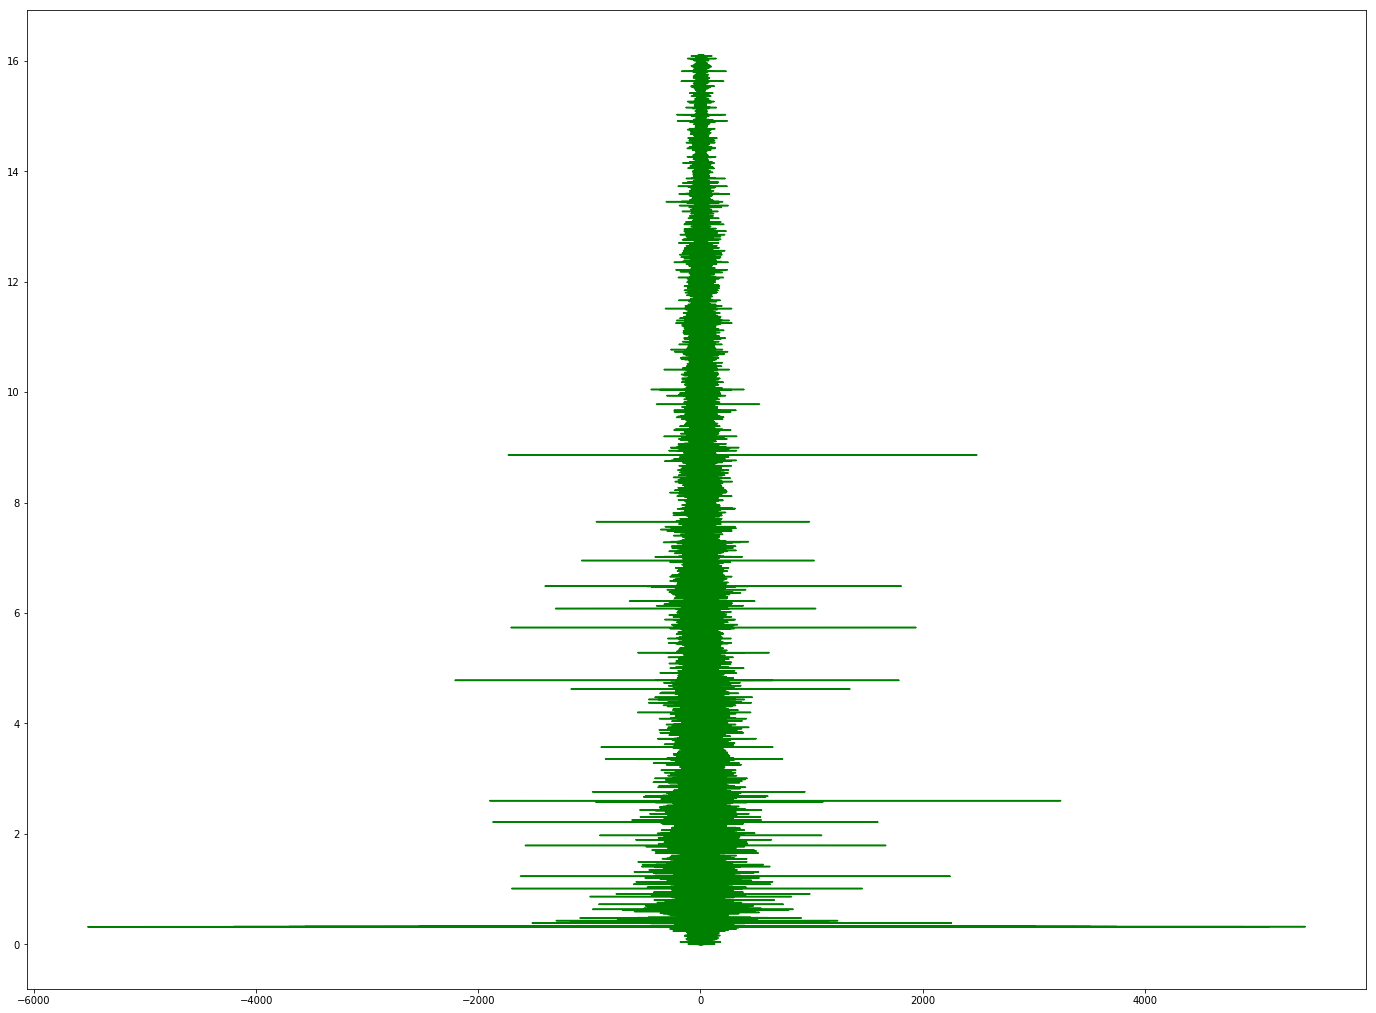

In [80]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
ax.plot(train_df['acoustic_data'], train_df['time_to_failure'], color='green')
#ax.hist(count_acoustic_more_20, color='gray', bins=60)
plt.show()

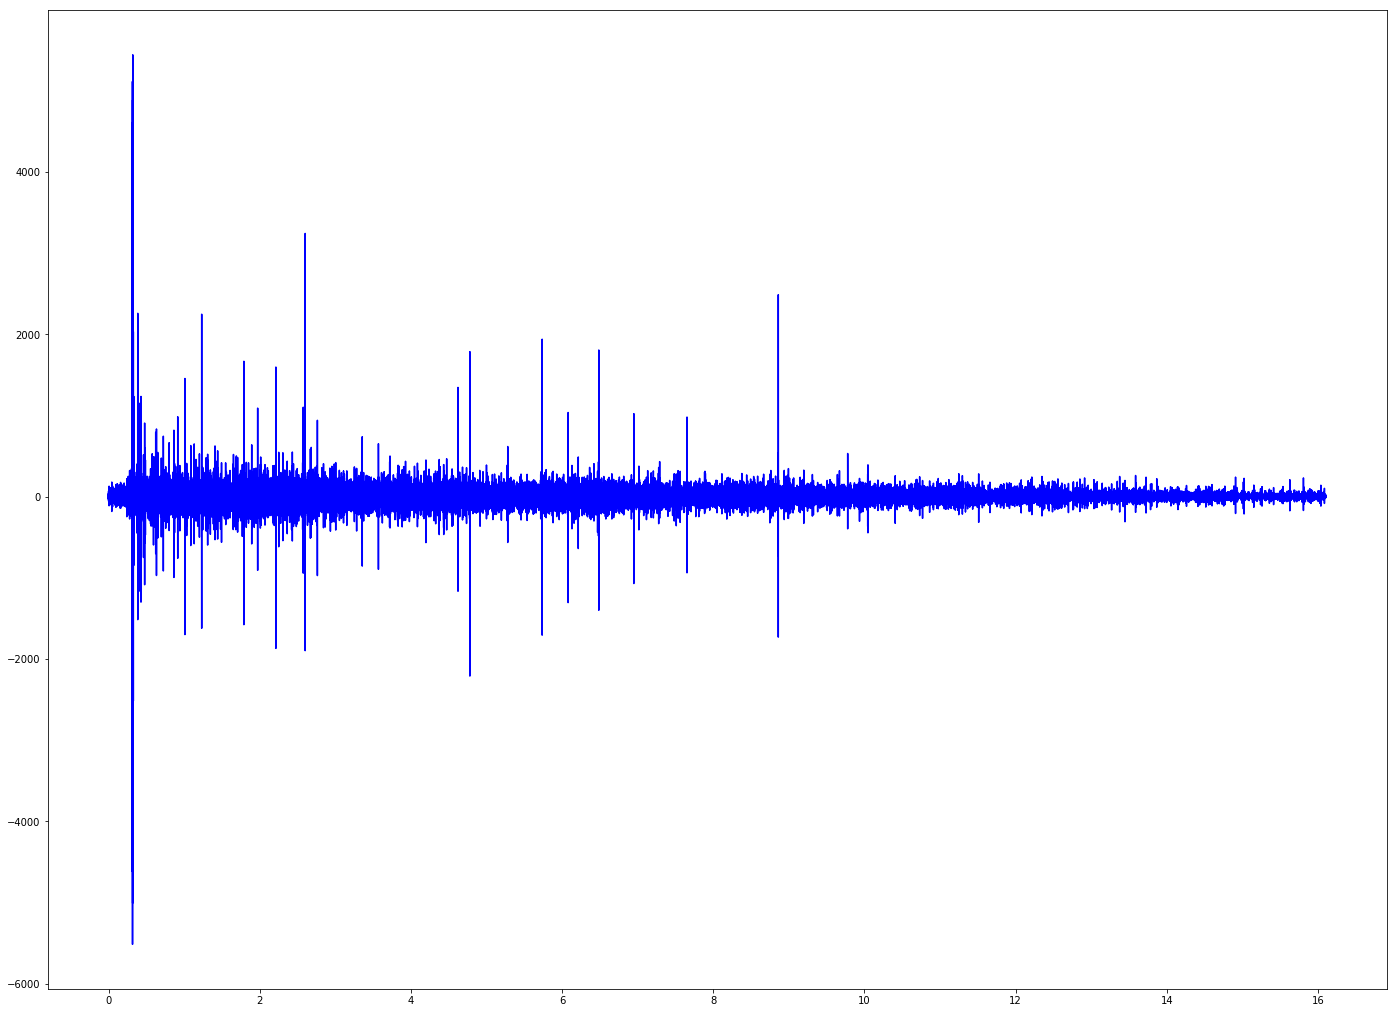

In [81]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
ax.plot(train_df['time_to_failure'], train_df['acoustic_data'], color='blue')
#ax.hist(count_acoustic_more_20, color='gray', bins=60)
plt.show()

In [82]:
gc.collect()

61153

In [83]:
gc.collect()

0

In [92]:
del grouped_train_series_by_acoustic
del acoustic_data_log
gc.collect()

215

In [93]:
count_train_series_time_to_failure = train_df['time_to_failure'].groupby(by=train_df['time_to_failure']).count()

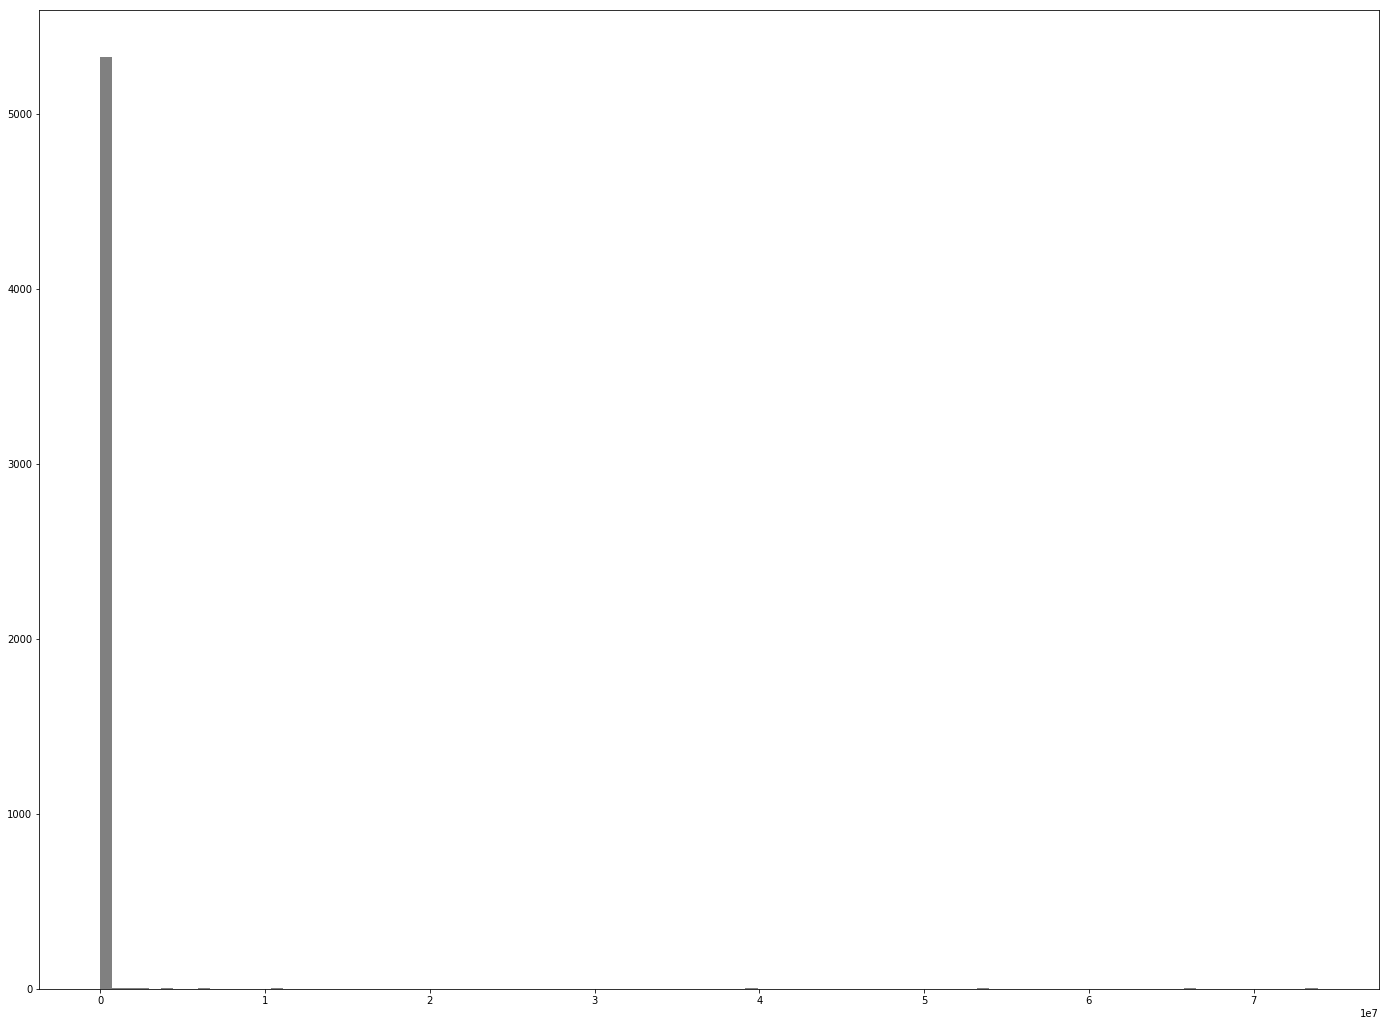

In [95]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_acoustic, color='gray', bins=100)
#ax.set_xscale('log')
plt.show()

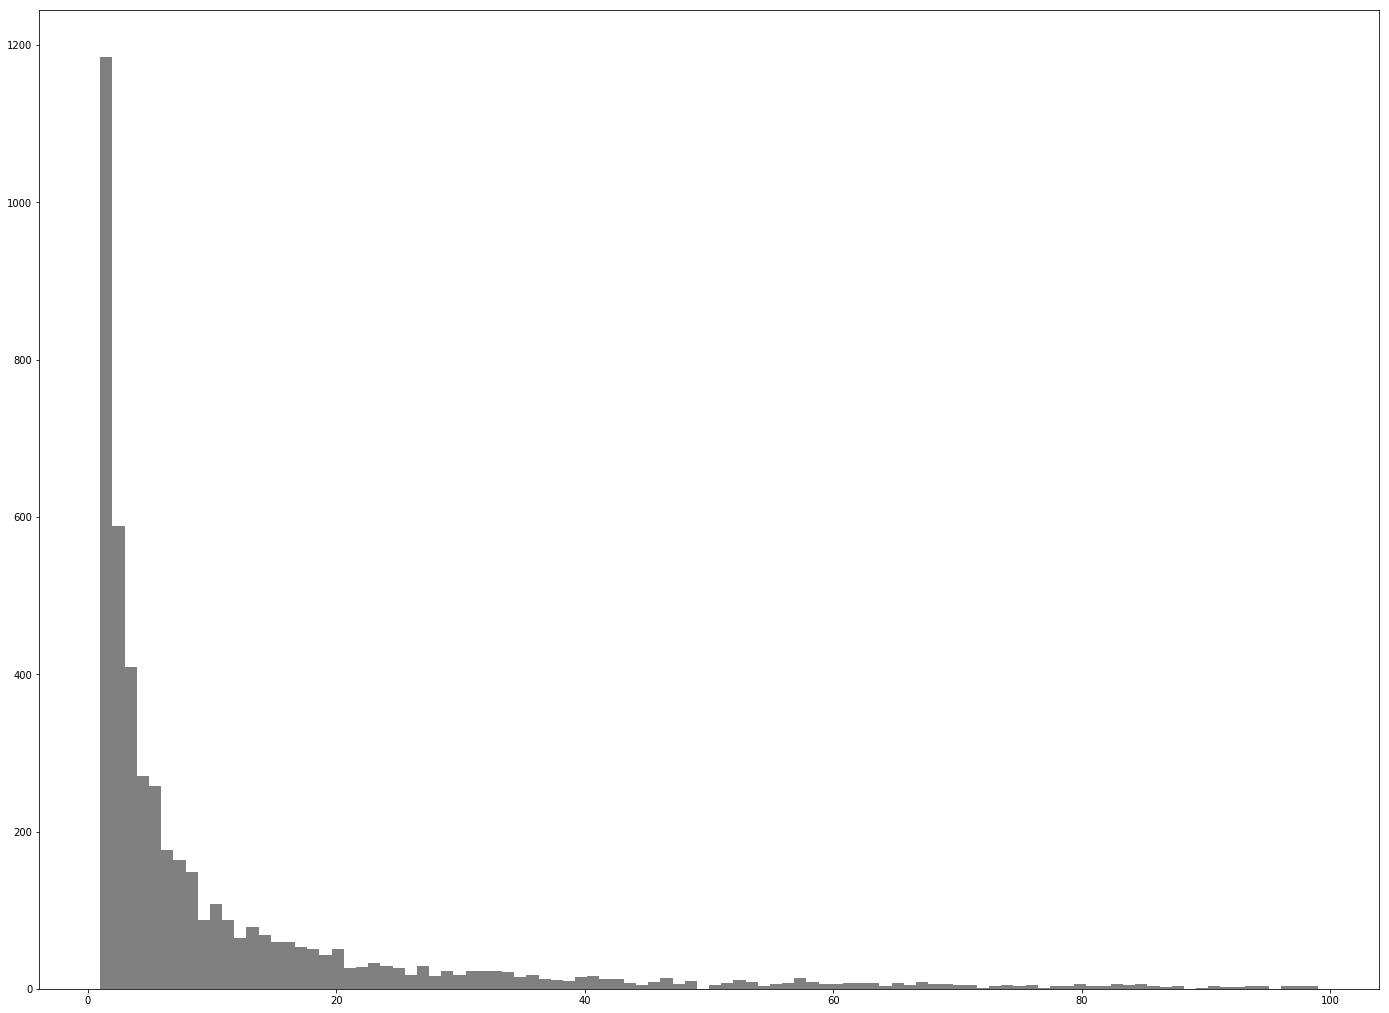

In [97]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_acoustic[np.abs(count_train_series_acoustic, color='gray', bins=100)
#ax.set_xscale('log')
plt.show()

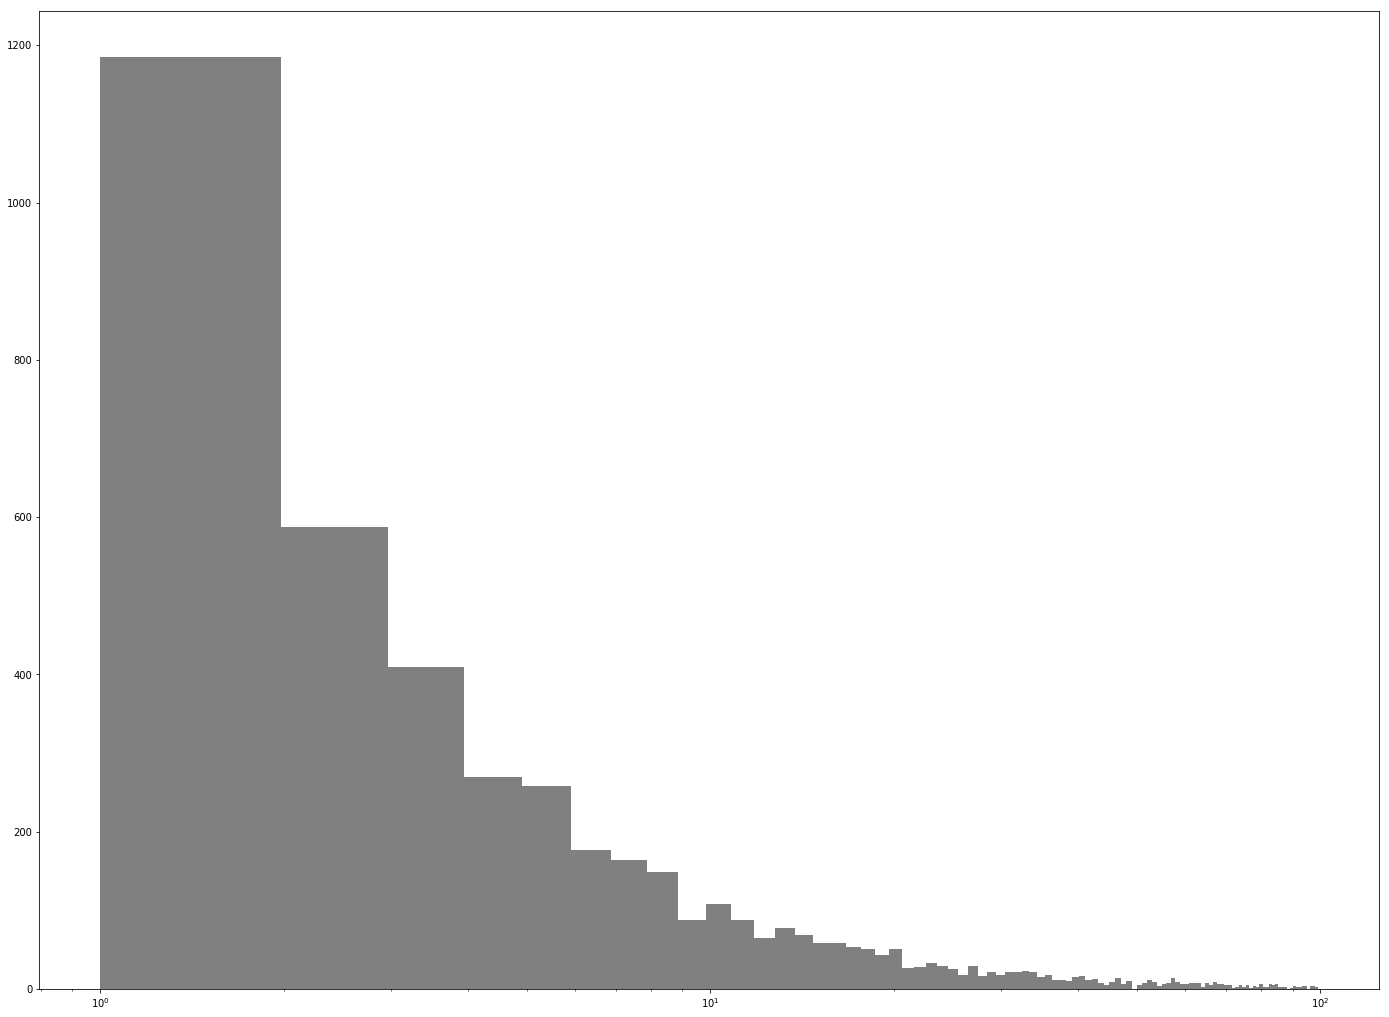

In [98]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_acoustic[np.abs(count_train_series_acoustic) < 100], color='gray', bins=100)
ax.set_xscale('log')
plt.show()

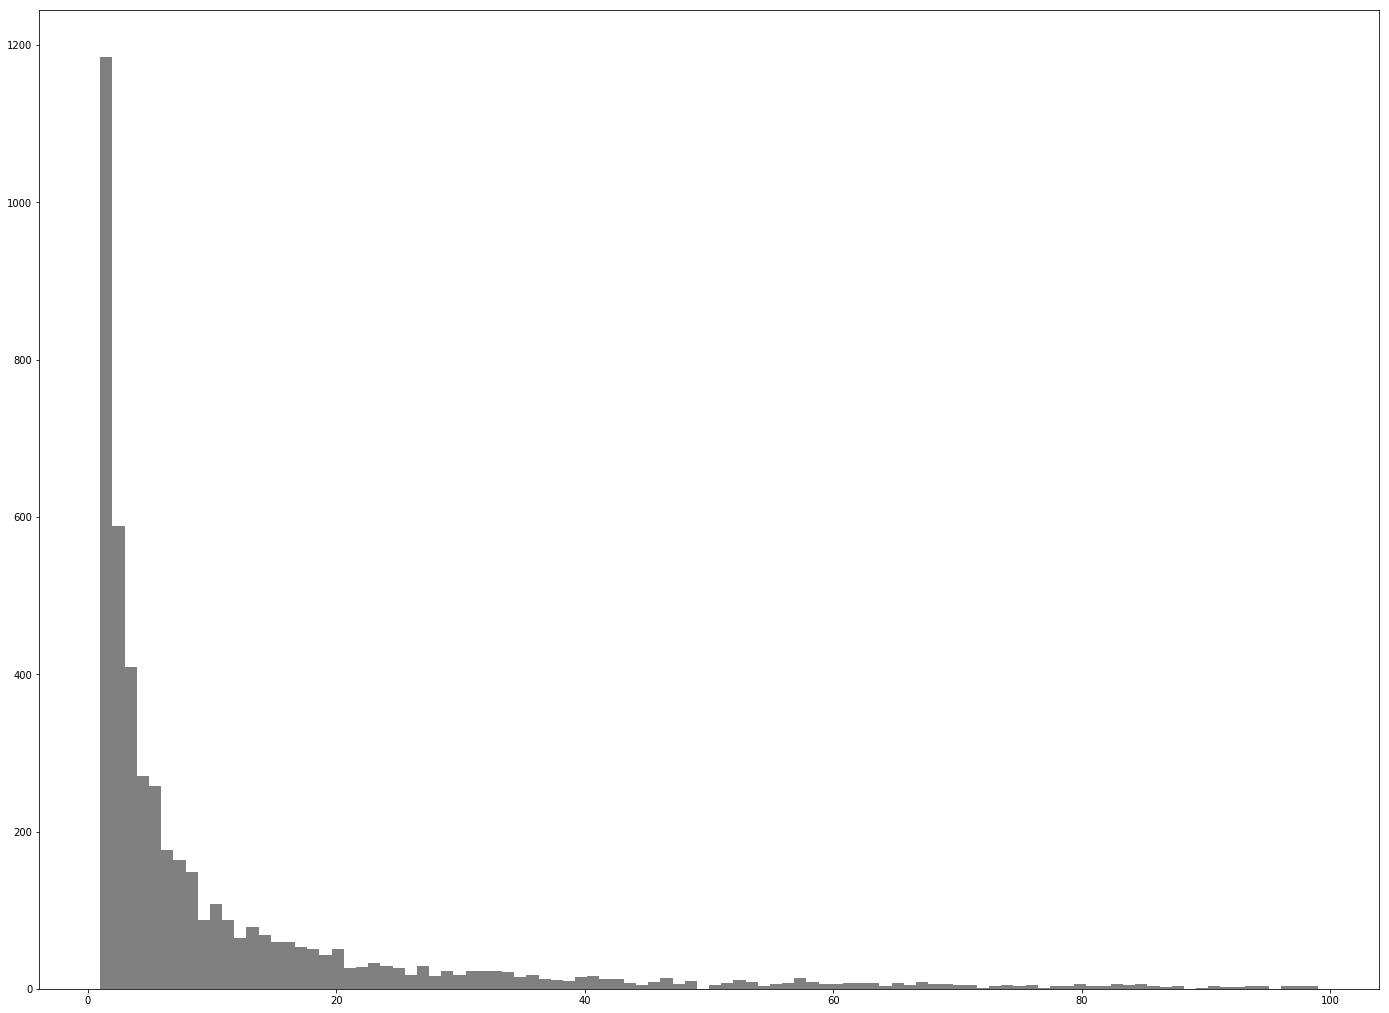

In [105]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
#ax.hist(count_train_series_acoustic[((count_train_series_acoustic > -100) and (count_train_series_acoustic < 100)).all()], color='gray', bins=100)
count_train_series_acoustic_filtered_100 = count_train_series_acoustic[count_train_series_acoustic > -100]
count_train_series_acoustic_filtered_100 = count_train_series_acoustic[count_train_series_acoustic < 100]
ax.hist(count_train_series_acoustic_filtered_100, color='gray', bins=100)
#ax.set_xscale('log')
plt.show()

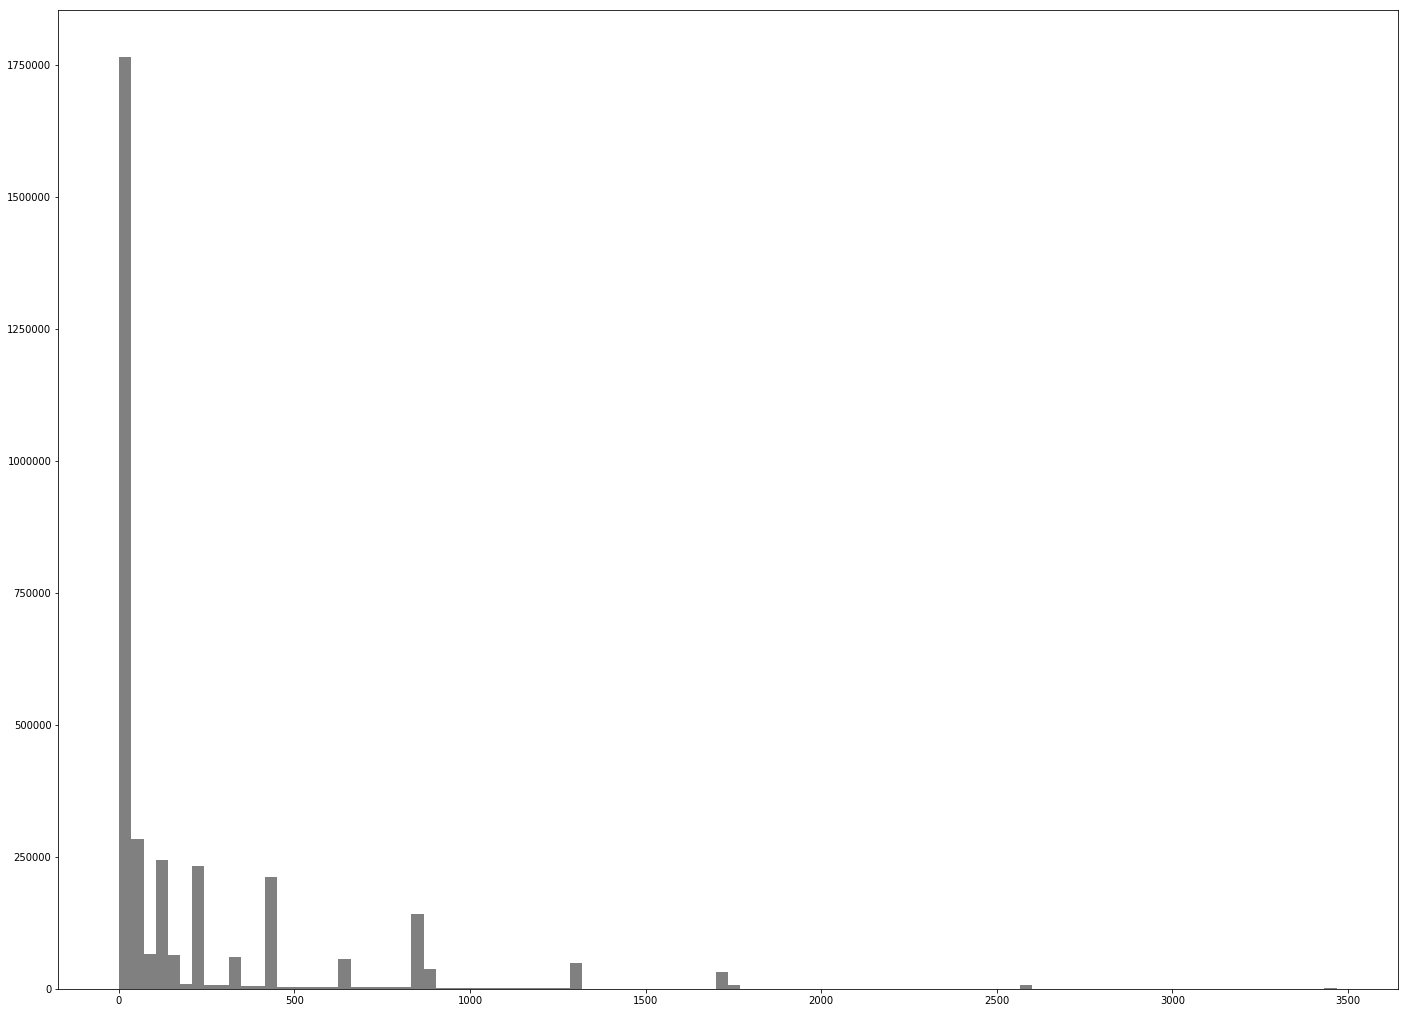

In [106]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_time_to_failure, color='gray', bins=100)
#ax.set_xscale('log')
plt.show()

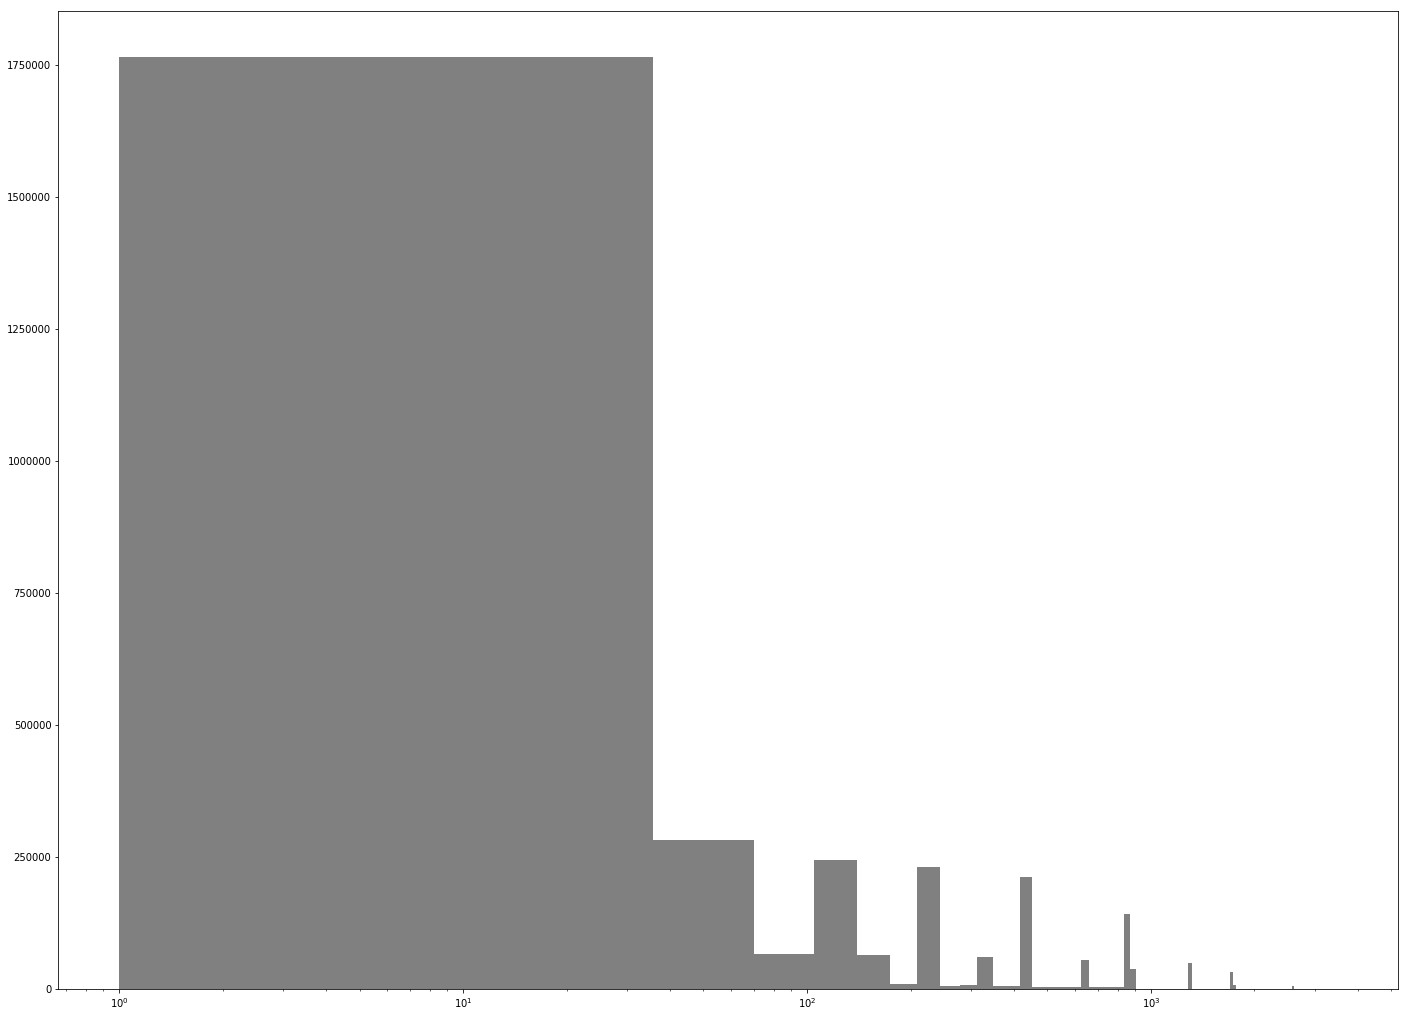

In [107]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_time_to_failure, color='gray', bins=100)
ax.set_xscale('log')
plt.show()

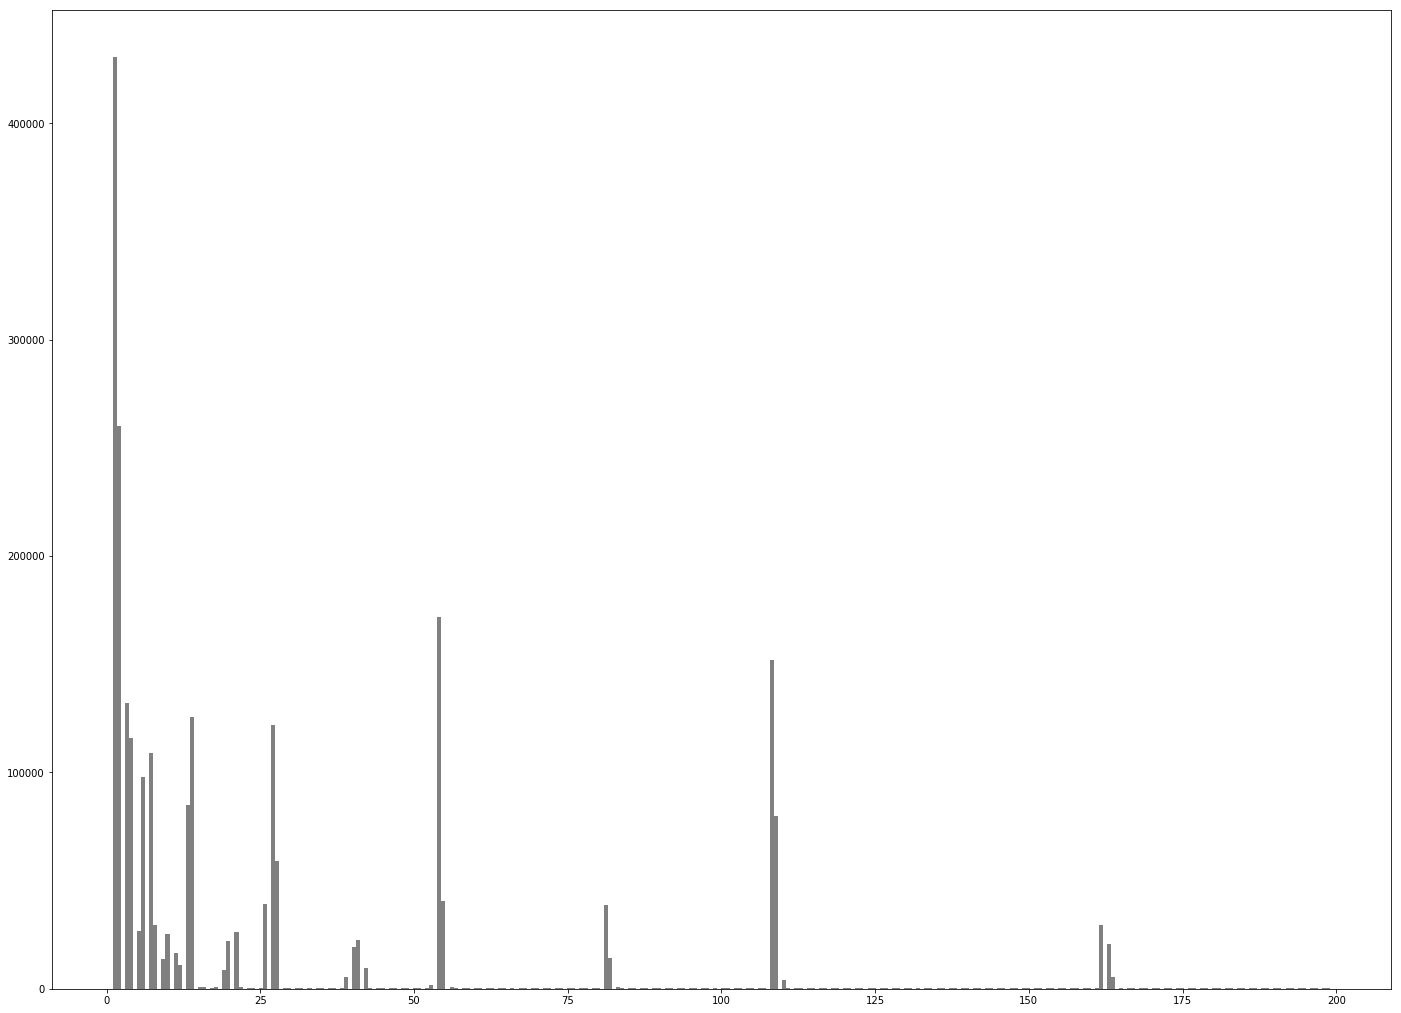

In [108]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_time_to_failure[count_train_series_time_to_failure < 200], color='gray', bins=300)
#ax.set_xscale('log')
plt.show()

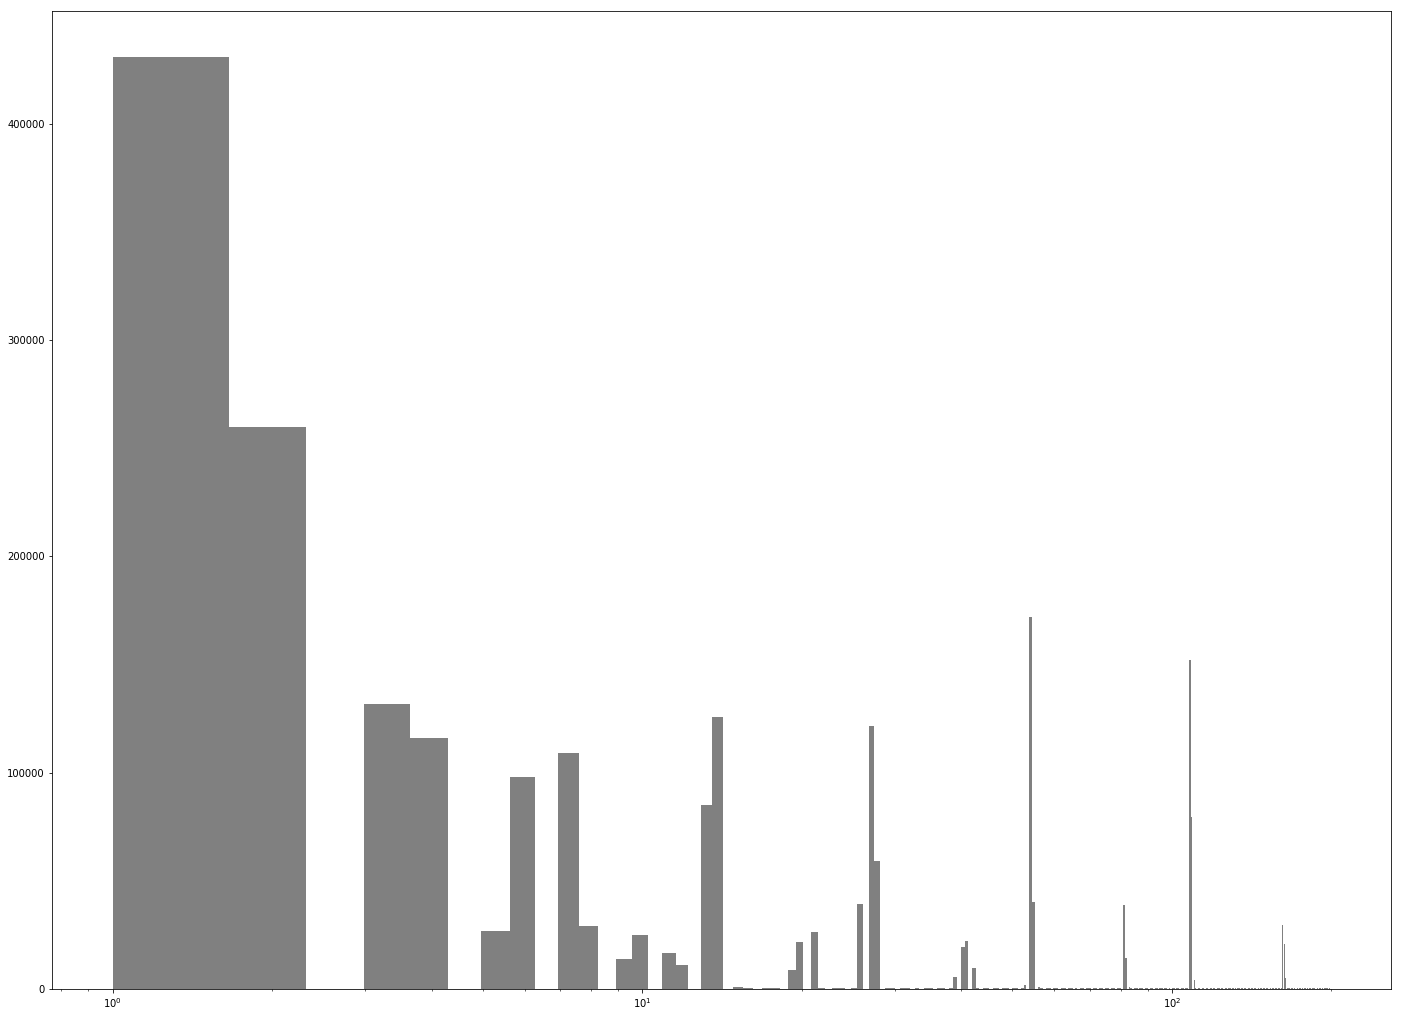

In [109]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.hist(count_train_series_time_to_failure[count_train_series_time_to_failure < 200], color='gray', bins=300)
ax.set_xscale('log')
plt.show()

In [111]:
print(count_train_series_time_to_failure.head())

time_to_failure
0.000096    1
0.000096    1
0.000096    1
0.000096    1
0.000096    1
Name: time_to_failure, dtype: int64


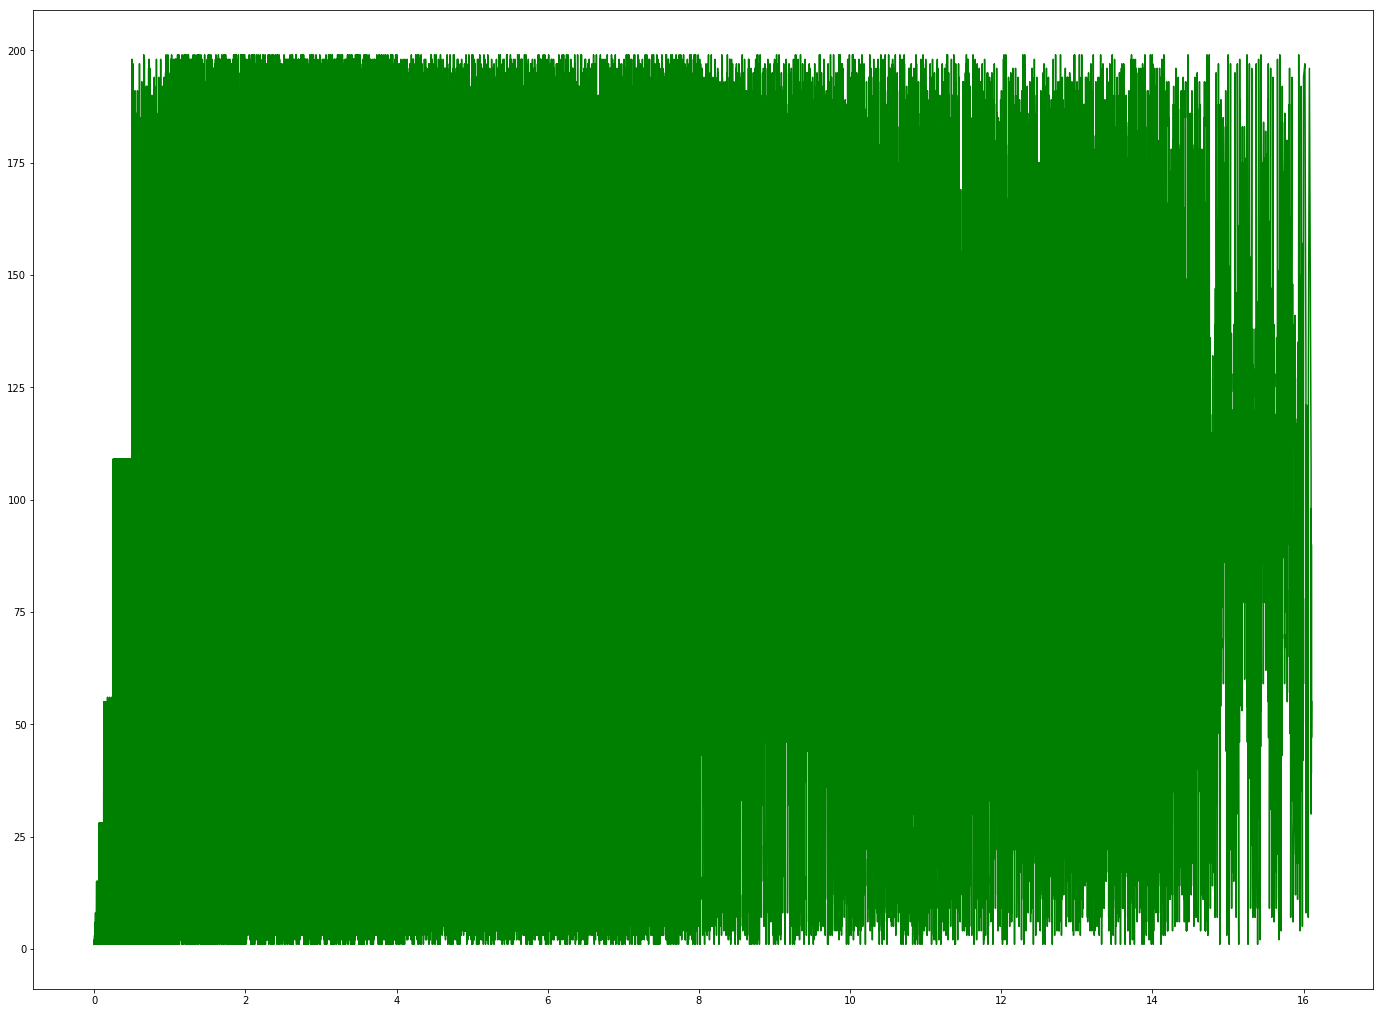

In [114]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
count_train_series_time_to_failure_200 = count_train_series_time_to_failure[count_train_series_time_to_failure < 200]
ax.plot(count_train_series_time_to_failure_200.index, count_train_series_time_to_failure_200.values, color='green')
#ax.set_xscale('log')
plt.show()

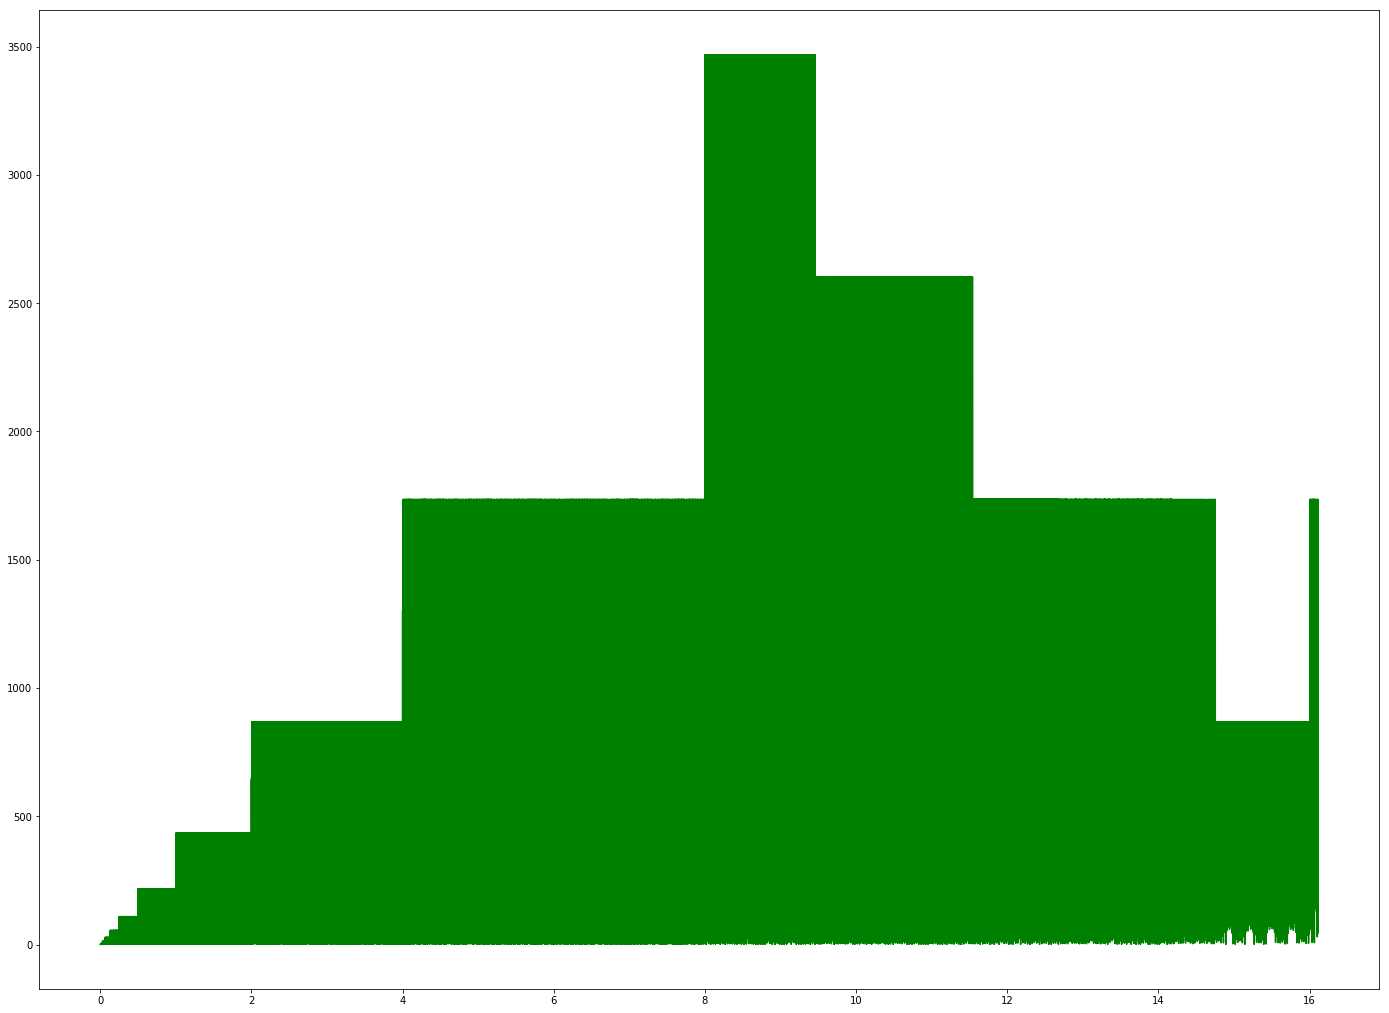

In [115]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
##ax.hist(count_train_series_acoustic, color='gray', bins=60)
ax.plot(count_train_series_time_to_failure.index, count_train_series_time_to_failure.values, color='green')
#ax.set_xscale('log')
plt.show()

In [116]:
gc.collect()

9644